Diagnostics notebook for Pypico

In [1]:
import zmq
import time
import logging
import sys

from motorControl import MotorControl
from cmdparse import SCPIParser

import pypico_settings

port = 5000

# setup logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
# create a file handler for the logger
fh = logging.FileHandler('motorControl.log')
fh.setLevel(logging.DEBUG)
# create a console handler for the logger
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
# create format for log file
fformatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
cformatter = logging.Formatter('%(levelname)s - %(message)s')
fh.setFormatter(fformatter)
ch.setFormatter(cformatter)
# add the handlers to the logger
logger.addHandler(fh)
logger.addHandler(ch)
# setup motor controller
mc = MotorControl(pypico_settings, logger,persist=True)

INFO - Connection to 192.168.1.121:23 succeeded.
WARNING - Hard starting, motor check will be performed.
INFO - Response: ''

INFO - Sending next command(0): 've?\r\n'
INFO - Response: '\xff\xfd\x03\xff\xfb\x018742 Version 2.2 08/01/13'

INFO - Sending next command(1): '*idn?\r\n'
INFO - Response: 'New_Focus 8742 v2.2 08/01/13 10948'

INFO - Sending next command(2): 'mc\r\n'
INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Sending next command(3): '1qm?\r\n'
INFO - Response: '2'

INFO - Motor 1: type 2
INFO - Response: ''

INFO - Sending next command(4): '1ac?\r\n'
INFO - Response: '100000'

INFO - Sending next command(5): '1va?\r\n'
INFO - Response: '1750'

INFO - Sending next command(6): '1tp?\r\n'
INFO - Response: '163888'

INFO - Sending next command(7): '2qm?\r\n'
INFO - Response: '2'



motor types:  [2, 0, 0, 0]
motor types: 

INFO - Motor 2: type 2
INFO - Response: ''

INFO - Sending next command(8): '2ac?\r\n'
INFO - Response: '100000'

INFO - Sending next command(9): '2va?\r\n'
INFO - Response: '1750'

INFO - Sending next command(10): '2tp?\r\n'
INFO - Response: '461874'

INFO - Sending next command(11): '3qm?\r\n'
INFO - Response: '2'

INFO - Motor 3: type 2
INFO - Response: ''

INFO - Sending next command(12): '3ac?\r\n'
INFO - Response: '200000'

INFO - Sending next command(13): '3va?\r\n'
INFO - Response: '1750'

INFO - Sending next command(14): '3tp?\r\n'
INFO - Response: '-2205'



 [2, 2, 0, 0]
motor types:  [2, 2, 2, 0]
Arduino: 


In [2]:
# checks current positions for all four channels
for i in range(0,4):
   print mc.getPosition(i)

INFO - Channel: 0 position: -2176.96289062
INFO - Channel: 1 position: 954.711914062
INFO - Channel: 2 position: -1801.49414062
INFO - Channel: 3 position: -50.009765625


780
0
-2176.96289062
780
1
954.711914062
480
2
-1801.49414062
480
3
-50.009765625


In [3]:
positions=[]
positions.append(mc.getPosition(0))

INFO - Channel: 0 position: -2176.96289062


780
0


Closed-loop movement test

In [4]:
positions=[]
positions.append(mc.getPosition(0))

INFO - Channel: 0 position: -2176.96289062


780
0


ROI:0, amplitude : 0.514841922018, location: -2423.10482343 , sigma:54.5264269822, offset:0.000515750427499
ROI:1, amplitude : 0.468839342629, location: -2310.76155138 , sigma:54.011480264, offset:0.00204452278912
ROI:2, amplitude : 0.622042528059, location: -2193.07525266 , sigma:49.6514306606, offset:0.00457321216902
ROI:3, amplitude : 0.4825766385, location: -2073.3413495 , sigma:61.6338734342, offset:-0.000249943802727
ROI:4, amplitude : 0.377012438985, location: -1960.8931022 , sigma:54.7771906406, offset:-0.00215792300146

In [10]:
mc.move_abs(0,-2193.0)
new_position=mc.getPosition(0)
positions.append(new_position)

INFO - Channel: 0 position: -1960.88378906
INFO - avg_steps: -9284.6484375
INFO - Need to go negative. Current position -1960.88378906 DEG. Setpoint -2193.0 DEG. Steps to be taken: -10285
INFO - Response: ''

INFO - Sending next command(56): '1PR-10285\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -2268.984375
INFO - Response: ''

INFO - Sending next command(57): '1PR2128\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -2208.38378906
INFO - Response: ''

INFO - Sending next command(58): '1PR431\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -2196.87011719
INFO - Response: ''

INFO - Sending next command(59): '1PR108\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -2193.92578125
INFO - Response: ''

INFO - Sending next command(60): '1PR26\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -2193.17871094
INFO - Response: ''

INFO - Sending next command(61): '1PR5\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -2193.00292969
INFO - New motor position is -2193.00292969 deg, error -0.0029296875 deg.
INFO - Channel: 0 position: -2193.00292969


780
0
780
0


In [6]:
positions

[-97.8662109375, -99]

Continuous position monitoring

In [4]:
positions1=[]
positions2=[]
positions3=[]
positions4=[]
positions1.append(mc.getPosition(0));
positions2.append(mc.getPosition(1));
positions3.append(mc.getPosition(2));
positions4.append(mc.getPosition(3));

start_time=time.time()
last_read_time=start_time
current_time=start_time
duration=10 # in sec
period=0.2 # in sec
while (current_time-start_time)<duration:
    current_time=time.time()
    if (current_time-last_read_time)>period:
        new_position1=mc.getPosition(0)
        positions1.append(new_position1)
        
        new_position2=mc.getPosition(1)
        positions2.append(new_position2)
        
        new_position3=mc.getPosition(2)
        positions3.append(new_position3)
        
        new_position4=mc.getPosition(3)
        positions4.append(new_position4)
        
        last_read_time=time.time()
print "DONE"

INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6063
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6063
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6066
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6066
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -6457
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-6457
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -7156
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-7156
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -7841
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-7841
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -8449
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-8449
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -9597
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-9597
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11384
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11384
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11636
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11636
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11819
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11819
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11819
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11819
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11819
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11819
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -11808
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-11808
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -13755
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-13755
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -14630
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-14630
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -15573
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-15573
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -16363
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-16363
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -17017
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-17017
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -18972
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-18972
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -21708
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-21708
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -23763
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-23763
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -23693
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-23693
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -23869
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-23869
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -24139
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-24139
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -28014
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-28014
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -29202
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-29202
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -31040
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-31040
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -31033
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-31033
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -31257
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-31257
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -37068
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-37068
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -37018
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-37018
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36813
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36813
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36839
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36839
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36839
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36839
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -36839
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-36839
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -37078
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-37078
780
1
pos:0
480
2
pos:0
480
3
pos:0


INFO - Channel: 0 position: -38142
INFO - Channel: 1 position: 0
INFO - Channel: 2 position: 0
INFO - Channel: 3 position: 0


780
0
pos:-38142
780
1
pos:0
480
2
pos:0
480
3
pos:0
DONE


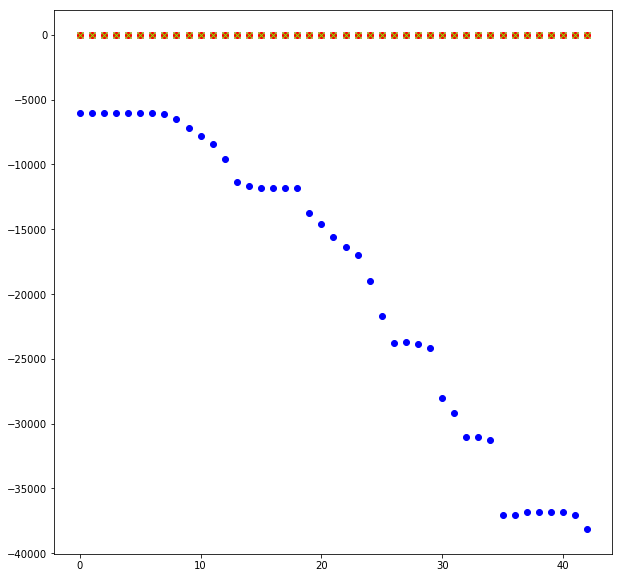

In [5]:
data1=map(int,positions1)
data2=map(int,positions2)
data3=map(int,positions3)
data4=map(int,positions4)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10));
plt.plot(data1,'bo');
plt.plot(data2,'ro');
plt.plot(data3,'gx');
plt.plot(data4,'yx');
plt.show()

In [ ]:
data

In [23]:
mc.getPosition(0)
mc.move_abs(0,10)

INFO - Channel: 0 position: -1.23046875
INFO - Channel: 0 position: -1.23046875
INFO - avg_steps: 499.755859375
INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(277): '1PR350\r\n'


780
0
pos:-7
780
0
pos:-7
780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(278): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(279): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(280): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(281): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(282): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(283): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(284): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(285): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(286): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(287): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(288): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(289): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(290): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(291): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(292): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(293): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(294): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(295): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
INFO - Response: ''

INFO - Sending next command(296): '1PR350\r\n'


780
0
pos:-7


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.23046875
ERROR - Current position -1.23046875 deg. Setpoint not achieved by -11.23046875 deg after max iterations.


780
0
pos:-7


0

In [1]:
for i in range(0,4):
   print mc.getPosition(i)

NameError: name 'mc' is not defined

In [2]:
## Closed-loop movement testing


INFO - Channel: 1 position: 68.02734375


780
1
pos:1548


In [66]:
import numpy as np
test_channel=0
random_sequence=np.random.randint(-100,400,30)
print random_sequence


[-63 -56 -48 299 244 200 200 -64 301 286 269 247 -40  37 340 -83  99  18
  47 191 -89 199 156   1  62 -48 -22 -73  17 -94]


In [67]:
positions=[]
mc.move_abs(test_channel,0) #move it back to zero.
positions.append(mc.getPosition(test_channel))
for i in random_sequence:
    mc.move_abs(test_channel,i)
    new_position=mc.getPosition(test_channel)
    positions.append(new_position)
print positions

INFO - Channel: 0 position: 11.07421875
INFO - avg_steps: -492.802734375
INFO - Need to go negative. Current position 11.07421875 DEG. Setpoint 0 DEG. Steps to be taken: -1493
INFO - Response: ''

INFO - Sending next command(983): '1PR-1493\r\n'


780
0
pos:252


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -32.87109375
INFO - Response: ''

INFO - Sending next command(984): '1PR1024\r\n'


780
0
pos:-748


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -8.1298828125
INFO - Response: ''

INFO - Sending next command(985): '1PR253\r\n'


780
0
pos:-185


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -4.3505859375
INFO - Response: ''

INFO - Sending next command(986): '1PR136\r\n'


780
0
pos:-99


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -2.4609375
INFO - Response: ''

INFO - Sending next command(987): '1PR77\r\n'


780
0
pos:-56


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -1.3623046875
INFO - Response: ''

INFO - Sending next command(988): '1PR42\r\n'


780
0
pos:-31


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -0.7470703125
INFO - Response: ''

INFO - Sending next command(989): '1PR23\r\n'


780
0
pos:-17


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -0.3955078125
INFO - Response: ''

INFO - Sending next command(990): '1PR12\r\n'


780
0
pos:-9


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -0.2197265625
INFO - Response: ''

INFO - Sending next command(991): '1PR7\r\n'


780
0
pos:-5


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -0.1318359375
INFO - Response: ''

INFO - Sending next command(992): '1PR4\r\n'


780
0
pos:-3


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -0.0439453125
INFO - Response: ''

INFO - Sending next command(993): '1PR1\r\n'


780
0
pos:-1


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -0.0439453125
INFO - Response: ''

INFO - Sending next command(994): '1PR1\r\n'


780
0
pos:-1


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -0.0439453125
INFO - Response: ''

INFO - Sending next command(995): '1PR1\r\n'


780
0
pos:-1


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 0.0
INFO - New motor position is 0.0 deg, error 0.0 deg.
INFO - Channel: 0 position: 0.0
INFO - Channel: 0 position: 0.0
INFO - avg_steps: -2803.5
INFO - Need to go negative. Current position 0.0 DEG. Setpoint -63 DEG. Steps to be taken: -3804
INFO - Response: ''

INFO - Sending next command(996): '1PR-3804\r\n'


780
0
pos:0
780
0
pos:0
780
0
pos:0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -109.731445312
INFO - Response: ''

INFO - Sending next command(997): '1PR1456\r\n'


780
0
pos:-2497


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -78.662109375
INFO - Response: ''

INFO - Sending next command(998): '1PR488\r\n'


780
0
pos:-1790


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -71.5869140625
INFO - Response: ''

INFO - Sending next command(999): '1PR267\r\n'


780
0
pos:-1629


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -67.8955078125
INFO - Response: ''

INFO - Sending next command(1000): '1PR152\r\n'


780
0
pos:-1545


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -65.654296875
INFO - Response: ''

INFO - Sending next command(1001): '1PR83\r\n'


780
0
pos:-1494


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -64.4677734375
INFO - Response: ''

INFO - Sending next command(1002): '1PR46\r\n'


780
0
pos:-1467


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.8525390625
INFO - Response: ''

INFO - Sending next command(1003): '1PR27\r\n'


780
0
pos:-1453


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.45703125
INFO - Response: ''

INFO - Sending next command(1004): '1PR14\r\n'


780
0
pos:-1444


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.2373046875
INFO - Response: ''

INFO - Sending next command(1005): '1PR7\r\n'


780
0
pos:-1439


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.10546875
INFO - Response: ''

INFO - Sending next command(1006): '1PR3\r\n'


780
0
pos:-1436


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.0615234375
INFO - Response: ''

INFO - Sending next command(1007): '1PR2\r\n'


780
0
pos:-1435


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.0615234375
INFO - Response: ''

INFO - Sending next command(1008): '1PR2\r\n'


780
0
pos:-1435


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.017578125
INFO - Response: ''

INFO - Sending next command(1009): '1PR1\r\n'


780
0
pos:-1434


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -63.017578125
INFO - Response: ''

INFO - Sending next command(1010): '1PR1\r\n'


780
0
pos:-1434


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -62.9736328125
INFO - New motor position is -62.9736328125 deg, error 0.0263671875 deg.
INFO - Channel: 0 position: -62.9736328125
INFO - Channel: 0 position: -62.9736328125
INFO - avg_steps: 310.326660156
INFO - Channel: 0 position: -62.9736328125
INFO - Response: ''

INFO - Sending next command(1011): '1PR217\r\n'


780
0
pos:-1433
780
0
pos:-1433
780
0
pos:-1433
780
0
pos:-1433


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -59.9853515625
INFO - Response: ''

INFO - Sending next command(1012): '1PR124\r\n'


780
0
pos:-1365


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -58.095703125
INFO - Response: ''

INFO - Sending next command(1013): '1PR65\r\n'


780
0
pos:-1322


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -57.12890625
INFO - Response: ''

INFO - Sending next command(1014): '1PR35\r\n'


780
0
pos:-1300


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -56.6015625
INFO - Response: ''

INFO - Sending next command(1015): '1PR19\r\n'


780
0
pos:-1288


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -56.25
INFO - Response: ''

INFO - Sending next command(1016): '1PR8\r\n'


780
0
pos:-1280


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -56.1181640625
INFO - Response: ''

INFO - Sending next command(1017): '1PR4\r\n'


780
0
pos:-1277


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -56.0302734375
INFO - Response: ''

INFO - Sending next command(1018): '1PR1\r\n'


780
0
pos:-1275


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -55.986328125
INFO - New motor position is -55.986328125 deg, error 0.013671875 deg.
INFO - Channel: 0 position: -55.986328125
INFO - Channel: 0 position: -55.986328125
INFO - avg_steps: 355.391601562
INFO - Channel: 0 position: -55.986328125
INFO - Response: ''

INFO - Sending next command(1019): '1PR249\r\n'


780
0
pos:-1274
780
0
pos:-1274
780
0
pos:-1274
780
0
pos:-1274


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -52.119140625
INFO - Response: ''

INFO - Sending next command(1020): '1PR128\r\n'


780
0
pos:-1186


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -50.361328125
INFO - Response: ''

INFO - Sending next command(1021): '1PR74\r\n'


780
0
pos:-1146


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -49.39453125
INFO - Response: ''

INFO - Sending next command(1022): '1PR43\r\n'


780
0
pos:-1124


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -48.8232421875
INFO - Response: ''

INFO - Sending next command(1023): '1PR26\r\n'


780
0
pos:-1111


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -48.427734375
INFO - Response: ''

INFO - Sending next command(1024): '1PR13\r\n'


780
0
pos:-1102


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -48.2080078125
INFO - Response: ''

INFO - Sending next command(1025): '1PR6\r\n'


780
0
pos:-1097


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -48.1201171875
INFO - Response: ''

INFO - Sending next command(1026): '1PR4\r\n'


780
0
pos:-1095


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -48.076171875
INFO - Response: ''

INFO - Sending next command(1027): '1PR2\r\n'


780
0
pos:-1094


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -48.0322265625
INFO - Response: ''

INFO - Sending next command(1028): '1PR1\r\n'


780
0
pos:-1093


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -48.0322265625
INFO - Response: ''

INFO - Sending next command(1029): '1PR1\r\n'


780
0
pos:-1093


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: -47.98828125
INFO - New motor position is -47.98828125 deg, error 0.01171875 deg.
INFO - Channel: 0 position: -47.98828125
INFO - Channel: 0 position: -47.98828125
INFO - avg_steps: 15440.9785156
INFO - Channel: 0 position: -47.98828125
INFO - Response: ''

INFO - Sending next command(1030): '1PR10809\r\n'


780
0
pos:-1092
780
0
pos:-1092
780
0
pos:-1092
780
0
pos:-1092


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 53.876953125
INFO - Response: ''

INFO - Sending next command(1031): '1PR7636\r\n'


780
0
pos:1226


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 111.049804688
INFO - Response: ''

INFO - Sending next command(1032): '1PR5855\r\n'


780
0
pos:2527


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 137.856445312
INFO - Response: ''

INFO - Sending next command(1033): '1PR5020\r\n'


780
0
pos:3137


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 156.928710938
INFO - Response: ''

INFO - Sending next command(1034): '1PR4426\r\n'


780
0
pos:3571


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 188.26171875
INFO - Response: ''

INFO - Sending next command(1035): '1PR3449\r\n'


780
0
pos:4284


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 224.912109375
INFO - Response: ''

INFO - Sending next command(1036): '1PR2308\r\n'


780
0
pos:5118


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 249.829101562
INFO - Response: ''

INFO - Sending next command(1037): '1PR1532\r\n'


780
0
pos:5685


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 262.661132812
INFO - Response: ''

INFO - Sending next command(1038): '1PR1132\r\n'


780
0
pos:5977


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 271.0546875
INFO - Response: ''

INFO - Sending next command(1039): '1PR870\r\n'


780
0
pos:6168


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 277.822265625
INFO - Response: ''

INFO - Sending next command(1040): '1PR660\r\n'


780
0
pos:6322


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 282.963867188
INFO - Response: ''

INFO - Sending next command(1041): '1PR500\r\n'


780
0
pos:6439


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 287.006835938
INFO - Response: ''

INFO - Sending next command(1042): '1PR374\r\n'


780
0
pos:6531


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 290.126953125
INFO - Response: ''

INFO - Sending next command(1043): '1PR276\r\n'


780
0
pos:6602


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 292.5
INFO - Response: ''

INFO - Sending next command(1044): '1PR202\r\n'


780
0
pos:6656


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 294.345703125
INFO - Response: ''

INFO - Sending next command(1045): '1PR145\r\n'


780
0
pos:6698


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 295.708007812
INFO - Response: ''

INFO - Sending next command(1046): '1PR103\r\n'


780
0
pos:6729


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 296.674804688
INFO - Response: ''

INFO - Sending next command(1047): '1PR72\r\n'


780
0
pos:6751


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 297.333984375
INFO - Response: ''

INFO - Sending next command(1048): '1PR52\r\n'


780
0
pos:6766


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 297.7734375
INFO - Response: ''

INFO - Sending next command(1049): '1PR38\r\n'


780
0
pos:6776


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 298.081054688
ERROR - Current position 298.081054688 deg. Setpoint not achieved by -0.9189453125 deg after max iterations.
INFO - Channel: 0 position: 298.081054688
INFO - Channel: 0 position: 298.081054688
INFO - avg_steps: -2406.60693359
INFO - Need to go negative. Current position 298.081054688 DEG. Setpoint 244 DEG. Steps to be taken: -3407
INFO - Response: ''

INFO - Sending next command(1050): '1PR-3407\r\n'


780
0
pos:6783
780
0
pos:6783
780
0
pos:6783


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 205.751953125
INFO - Response: ''

INFO - Sending next command(1051): '1PR1191\r\n'


780
0
pos:4682


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 227.63671875
INFO - Response: ''

INFO - Sending next command(1052): '1PR510\r\n'


780
0
pos:5180


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 234.84375
INFO - Response: ''

INFO - Sending next command(1053): '1PR285\r\n'


780
0
pos:5344


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 238.754882812
INFO - Response: ''

INFO - Sending next command(1054): '1PR163\r\n'


780
0
pos:5433


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 240.908203125
INFO - Response: ''

INFO - Sending next command(1055): '1PR96\r\n'


780
0
pos:5482


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 242.094726562
INFO - Response: ''

INFO - Sending next command(1056): '1PR59\r\n'


780
0
pos:5509


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 242.9296875
INFO - Response: ''

INFO - Sending next command(1057): '1PR33\r\n'


780
0
pos:5528


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 243.413085938
INFO - Response: ''

INFO - Sending next command(1058): '1PR18\r\n'


780
0
pos:5539


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 243.676757812
INFO - Response: ''

INFO - Sending next command(1059): '1PR10\r\n'


780
0
pos:5545


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 243.852539062
INFO - Response: ''

INFO - Sending next command(1060): '1PR5\r\n'


780
0
pos:5549


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 243.896484375
INFO - Response: ''

INFO - Sending next command(1061): '1PR3\r\n'


780
0
pos:5550


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 243.940429688
INFO - Response: ''

INFO - Sending next command(1062): '1PR2\r\n'


780
0
pos:5551


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 243.984375
INFO - Response: ''

INFO - Sending next command(1063): '1PR1\r\n'


780
0
pos:5552


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 243.984375
INFO - Response: ''

INFO - Sending next command(1064): '1PR1\r\n'


780
0
pos:5552


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 244.028320312
INFO - New motor position is 244.028320312 deg, error 0.0283203125 deg.
INFO - Channel: 0 position: 244.028320312
INFO - Channel: 0 position: 244.028320312
INFO - avg_steps: -1959.26025391
INFO - Need to go negative. Current position 244.028320312 DEG. Setpoint 200 DEG. Steps to be taken: -2959
INFO - Response: ''

INFO - Sending next command(1065): '1PR-2959\r\n'


780
0
pos:5553
780
0
pos:5553
780
0
pos:5553


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 172.529296875
INFO - Response: ''

INFO - Sending next command(1066): '1PR856\r\n'


780
0
pos:3926


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 185.932617188
INFO - Response: ''

INFO - Sending next command(1067): '1PR438\r\n'


780
0
pos:4231


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 190.590820312
INFO - Response: ''

INFO - Sending next command(1068): '1PR293\r\n'


780
0
pos:4337


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 193.579101562
INFO - Response: ''

INFO - Sending next command(1069): '1PR200\r\n'


780
0
pos:4405


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 195.556640625
INFO - Response: ''

INFO - Sending next command(1070): '1PR138\r\n'


780
0
pos:4450


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 197.006835938
INFO - Response: ''

INFO - Sending next command(1071): '1PR93\r\n'


780
0
pos:4483


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 198.10546875
INFO - Response: ''

INFO - Sending next command(1072): '1PR59\r\n'


780
0
pos:4508


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 198.80859375
INFO - Response: ''

INFO - Sending next command(1073): '1PR37\r\n'


780
0
pos:4524


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.248046875
INFO - Response: ''

INFO - Sending next command(1074): '1PR23\r\n'


780
0
pos:4534


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.555664062
INFO - Response: ''

INFO - Sending next command(1075): '1PR14\r\n'


780
0
pos:4541


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.731445312
INFO - Response: ''

INFO - Sending next command(1076): '1PR8\r\n'


780
0
pos:4545


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.86328125
INFO - Response: ''

INFO - Sending next command(1077): '1PR4\r\n'


780
0
pos:4548


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.907226562
INFO - Response: ''

INFO - Sending next command(1078): '1PR3\r\n'


780
0
pos:4549


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.951171875
INFO - Response: ''

INFO - Sending next command(1079): '1PR2\r\n'


780
0
pos:4550


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.951171875
INFO - Response: ''

INFO - Sending next command(1080): '1PR2\r\n'


780
0
pos:4550


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 199.995117188
INFO - New motor position is 199.995117188 deg, error -0.0048828125 deg.
INFO - Channel: 0 position: 199.995117188
INFO - Channel: 0 position: 199.995117188
INFO - Already within acceptable angle error, not moving
INFO - Channel: 0 position: 199.995117188
INFO - Channel: 0 position: 199.995117188
INFO - avg_steps: -11747.7827148
INFO - Need to go negative. Current position 199.995117188 DEG. Setpoint -64 DEG. Steps to be taken: -12748
INFO - Response: ''

INFO - Sending next command(1081): '1PR-12748\r\n'


780
0
pos:4551
780
0
pos:4551
780
0
pos:4551
780
0
pos:4551
780
0
pos:4551


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 103.974609375
ERROR - Current position 103.974609375 deg. Setpoint exceeded by 167.974609375 deg
INFO - Channel: 0 position: 103.974609375
INFO - Channel: 0 position: 103.974609375
INFO - avg_steps: 8767.62988281
INFO - Channel: 0 position: 103.974609375
INFO - Response: ''

INFO - Sending next command(1082): '1PR6137\r\n'


780
0
pos:2366
780
0
pos:2366
780
0
pos:2366
780
0
pos:2366


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 131.8359375
INFO - Response: ''

INFO - Sending next command(1083): '1PR5269\r\n'


780
0
pos:3000


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 149.58984375
INFO - Response: ''

INFO - Sending next command(1084): '1PR4716\r\n'


780
0
pos:3404


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 168.706054688
INFO - Response: ''

INFO - Sending next command(1085): '1PR4121\r\n'


780
0
pos:3839


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 205.532226562
INFO - Response: ''

INFO - Sending next command(1086): '1PR2974\r\n'


780
0
pos:4677


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 239.677734375
INFO - Response: ''

INFO - Sending next command(1087): '1PR1910\r\n'


780
0
pos:5454


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 257.915039062
INFO - Response: ''

INFO - Sending next command(1088): '1PR1342\r\n'


780
0
pos:5869


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 269.47265625
INFO - Response: ''

INFO - Sending next command(1089): '1PR982\r\n'


780
0
pos:6132


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 278.0859375
INFO - Response: ''

INFO - Sending next command(1090): '1PR714\r\n'


780
0
pos:6328


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 284.545898438
INFO - Response: ''

INFO - Sending next command(1091): '1PR513\r\n'


780
0
pos:6475


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 289.204101562
INFO - Response: ''

INFO - Sending next command(1092): '1PR367\r\n'


780
0
pos:6581


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 292.67578125
INFO - Response: ''

INFO - Sending next command(1093): '1PR259\r\n'


780
0
pos:6660


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 295.224609375
INFO - Response: ''

INFO - Sending next command(1094): '1PR180\r\n'


780
0
pos:6718


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 296.89453125
INFO - Response: ''

INFO - Sending next command(1095): '1PR128\r\n'


780
0
pos:6756


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 298.037109375
INFO - Response: ''

INFO - Sending next command(1096): '1PR92\r\n'


780
0
pos:6782


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 298.784179688
INFO - Response: ''

INFO - Sending next command(1097): '1PR69\r\n'


780
0
pos:6799


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 299.311523438
INFO - Response: ''

INFO - Sending next command(1098): '1PR53\r\n'


780
0
pos:6811


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 299.750976562
INFO - Response: ''

INFO - Sending next command(1099): '1PR39\r\n'


780
0
pos:6821


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 300.05859375
INFO - Response: ''

INFO - Sending next command(1100): '1PR29\r\n'


780
0
pos:6828


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 300.234375
INFO - Response: ''

INFO - Sending next command(1101): '1PR24\r\n'


780
0
pos:6832


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 300.454101562
ERROR - Current position 300.454101562 deg. Setpoint not achieved by -0.5458984375 deg after max iterations.
INFO - Channel: 0 position: 300.454101562
INFO - Channel: 0 position: 300.454101562
INFO - avg_steps: -643.207519531
INFO - Need to go negative. Current position 300.454101562 DEG. Setpoint 286 DEG. Steps to be taken: -1643
INFO - Response: ''

INFO - Sending next command(1102): '1PR-1643\r\n'


780
0
pos:6837
780
0
pos:6837
780
0
pos:6837


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 256.640625
INFO - Response: ''

INFO - Sending next command(1103): '1PR915\r\n'


780
0
pos:5840


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 273.208007812
INFO - Response: ''

INFO - Sending next command(1104): '1PR398\r\n'


780
0
pos:6217


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 277.822265625
INFO - Response: ''

INFO - Sending next command(1105): '1PR255\r\n'


780
0
pos:6322


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 280.458984375
INFO - Response: ''

INFO - Sending next command(1106): '1PR173\r\n'


780
0
pos:6382


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 282.260742188
INFO - Response: ''

INFO - Sending next command(1107): '1PR116\r\n'


780
0
pos:6423


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 283.491210938
INFO - Response: ''

INFO - Sending next command(1108): '1PR78\r\n'


780
0
pos:6451


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 284.326171875
INFO - Response: ''

INFO - Sending next command(1109): '1PR52\r\n'


780
0
pos:6470


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 284.897460938
INFO - Response: ''

INFO - Sending next command(1110): '1PR34\r\n'


780
0
pos:6483


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.336914062
INFO - Response: ''

INFO - Sending next command(1111): '1PR21\r\n'


780
0
pos:6493


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.556640625
INFO - Response: ''

INFO - Sending next command(1112): '1PR14\r\n'


780
0
pos:6498


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.688476562
INFO - Response: ''

INFO - Sending next command(1113): '1PR10\r\n'


780
0
pos:6501


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.8203125
INFO - Response: ''

INFO - Sending next command(1114): '1PR6\r\n'


780
0
pos:6504


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.908203125
INFO - Response: ''

INFO - Sending next command(1115): '1PR3\r\n'


780
0
pos:6506


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.952148438
INFO - Response: ''

INFO - Sending next command(1116): '1PR1\r\n'


780
0
pos:6507


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.952148438
INFO - Response: ''

INFO - Sending next command(1117): '1PR1\r\n'


780
0
pos:6507


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.952148438
INFO - Response: ''

INFO - Sending next command(1118): '1PR1\r\n'


780
0
pos:6507


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.952148438
INFO - Response: ''

INFO - Sending next command(1119): '1PR1\r\n'


780
0
pos:6507


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 285.99609375
INFO - New motor position is 285.99609375 deg, error -0.00390625 deg.
INFO - Channel: 0 position: 285.99609375
INFO - Channel: 0 position: 285.99609375
INFO - avg_steps: -756.326171875
INFO - Need to go negative. Current position 285.99609375 DEG. Setpoint 269 DEG. Steps to be taken: -1756
INFO - Response: ''

INFO - Sending next command(1120): '1PR-1756\r\n'


780
0
pos:6508
780
0
pos:6508
780
0
pos:6508


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 238.579101562
INFO - Response: ''

INFO - Sending next command(1121): '1PR948\r\n'


780
0
pos:5429


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 256.11328125
INFO - Response: ''

INFO - Sending next command(1122): '1PR401\r\n'


780
0
pos:5828


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 260.244140625
INFO - Response: ''

INFO - Sending next command(1123): '1PR273\r\n'


780
0
pos:5922


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 262.836914062
INFO - Response: ''

INFO - Sending next command(1124): '1PR192\r\n'


780
0
pos:5981


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 264.682617188
INFO - Response: ''

INFO - Sending next command(1125): '1PR134\r\n'


780
0
pos:6023


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 265.95703125
INFO - Response: ''

INFO - Sending next command(1126): '1PR95\r\n'


780
0
pos:6052


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 266.923828125
INFO - Response: ''

INFO - Sending next command(1127): '1PR65\r\n'


780
0
pos:6074


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 267.583007812
INFO - Response: ''

INFO - Sending next command(1128): '1PR44\r\n'


780
0
pos:6089


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.06640625
INFO - Response: ''

INFO - Sending next command(1129): '1PR29\r\n'


780
0
pos:6100


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.374023438
INFO - Response: ''

INFO - Sending next command(1130): '1PR19\r\n'


780
0
pos:6107


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.59375
INFO - Response: ''

INFO - Sending next command(1131): '1PR13\r\n'


780
0
pos:6112


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.725585938
INFO - Response: ''

INFO - Sending next command(1132): '1PR9\r\n'


780
0
pos:6115


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.813476562
INFO - Response: ''

INFO - Sending next command(1133): '1PR6\r\n'


780
0
pos:6117


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.901367188
INFO - Response: ''

INFO - Sending next command(1134): '1PR3\r\n'


780
0
pos:6119


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.901367188
INFO - Response: ''

INFO - Sending next command(1135): '1PR3\r\n'


780
0
pos:6119


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.9453125
INFO - Response: ''

INFO - Sending next command(1136): '1PR2\r\n'


780
0
pos:6120


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 268.989257812
INFO - New motor position is 268.989257812 deg, error -0.0107421875 deg.
INFO - Channel: 0 position: 268.989257812
INFO - Channel: 0 position: 268.989257812
INFO - avg_steps: -978.521972656
INFO - Need to go negative. Current position 268.989257812 DEG. Setpoint 247 DEG. Steps to be taken: -1979
INFO - Response: ''

INFO - Sending next command(1137): '1PR-1979\r\n'


780
0
pos:6121
780
0
pos:6121
780
0
pos:6121


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 217.353515625
INFO - Response: ''

INFO - Sending next command(1138): '1PR923\r\n'


780
0
pos:4946


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 235.151367188
INFO - Response: ''

INFO - Sending next command(1139): '1PR369\r\n'


780
0
pos:5351


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 240.029296875
INFO - Response: ''

INFO - Sending next command(1140): '1PR217\r\n'


780
0
pos:5462


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 242.666015625
INFO - Response: ''

INFO - Sending next command(1141): '1PR135\r\n'


780
0
pos:5522


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 244.3359375
INFO - Response: ''

INFO - Sending next command(1142): '1PR83\r\n'


780
0
pos:5560


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 245.302734375
INFO - Response: ''

INFO - Sending next command(1143): '1PR53\r\n'


780
0
pos:5582


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 245.91796875
INFO - Response: ''

INFO - Sending next command(1144): '1PR34\r\n'


780
0
pos:5596


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.313476562
INFO - Response: ''

INFO - Sending next command(1145): '1PR21\r\n'


780
0
pos:5605


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.577148438
INFO - Response: ''

INFO - Sending next command(1146): '1PR13\r\n'


780
0
pos:5611


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.752929688
INFO - Response: ''

INFO - Sending next command(1147): '1PR8\r\n'


780
0
pos:5615


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.840820312
INFO - Response: ''

INFO - Sending next command(1148): '1PR5\r\n'


780
0
pos:5617


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.928710938
INFO - Response: ''

INFO - Sending next command(1149): '1PR2\r\n'


780
0
pos:5619


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.928710938
INFO - Response: ''

INFO - Sending next command(1150): '1PR2\r\n'


780
0
pos:5619


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.928710938
INFO - Response: ''

INFO - Sending next command(1151): '1PR2\r\n'


780
0
pos:5619


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.97265625
INFO - Response: ''

INFO - Sending next command(1152): '1PR1\r\n'


780
0
pos:5620


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.97265625
INFO - Response: ''

INFO - Sending next command(1153): '1PR1\r\n'


780
0
pos:5620


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 246.97265625
INFO - Response: ''

INFO - Sending next command(1154): '1PR1\r\n'


780
0
pos:5620


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 247.016601562
INFO - New motor position is 247.016601562 deg, error 0.0166015625 deg.
INFO - Channel: 0 position: 247.016601562
INFO - Channel: 0 position: 247.016601562
INFO - avg_steps: -12772.2387695
INFO - Need to go negative. Current position 247.016601562 DEG. Setpoint -40 DEG. Steps to be taken: -13772
INFO - Response: ''

INFO - Sending next command(1155): '1PR-13772\r\n'


780
0
pos:5621
780
0
pos:5621
780
0
pos:5621


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 124.1015625
ERROR - Current position 124.1015625 deg. Setpoint exceeded by 164.1015625 deg
INFO - Channel: 0 position: 124.1015625
INFO - Channel: 0 position: 124.1015625
INFO - avg_steps: -3876.01953125
INFO - Need to go negative. Current position 124.1015625 DEG. Setpoint 37 DEG. Steps to be taken: -4876
INFO - Response: ''

INFO - Sending next command(1156): '1PR-4876\r\n'


780
0
pos:2824
780
0
pos:2824
780
0
pos:2824


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 107.006835938
ERROR - Current position 107.006835938 deg. Setpoint exceeded by 70.0068359375 deg
INFO - Channel: 0 position: 107.006835938
INFO - Channel: 0 position: 107.006835938
INFO - avg_steps: 10368.1958008
INFO - Channel: 0 position: 107.006835938
INFO - Response: ''

INFO - Sending next command(1157): '1PR7258\r\n'


780
0
pos:2435
780
0
pos:2435
780
0
pos:2435
780
0
pos:2435


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.431640625
INFO - Response: ''

INFO - Sending next command(1158): '1PR6777\r\n'


780
0
pos:2786


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1159): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1160): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1161): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1162): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1163): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1164): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1165): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1166): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1167): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1168): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1169): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1170): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1171): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1172): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1173): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1174): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1175): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1176): '1PR6776\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint not achieved by -217.524414062 deg after max iterations.
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -9143.66357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint -83 DEG. Steps to be taken: -10144
INFO - Response: ''

INFO - Sending next command(1177): '1PR-10144\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint exceeded by 205.475585938 deg
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -1044.66357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint 99 DEG. Steps to be taken: -2045
INFO - Response: ''

INFO - Sending next command(1178): '1PR-2045\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint exceeded by 23.4755859375 deg
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -4649.16357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint 18 DEG. Steps to be taken: -5649
INFO - Response: ''

INFO - Sending next command(1179): '1PR-5649\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint exceeded by 104.475585938 deg
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -3358.66357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint 47 DEG. Steps to be taken: -4359
INFO - Response: ''

INFO - Sending next command(1180): '1PR-4359\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.431640625
ERROR - Current position 122.431640625 deg. Setpoint exceeded by 75.431640625 deg
INFO - Channel: 0 position: 122.431640625
INFO - Channel: 0 position: 122.431640625
INFO - avg_steps: 3051.29199219
INFO - Channel: 0 position: 122.431640625
INFO - Response: ''

INFO - Sending next command(1181): '1PR2136\r\n'


780
0
pos:2786
780
0
pos:2786
780
0
pos:2786
780
0
pos:2786


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1182): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1183): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1184): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1185): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1186): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1187): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1188): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1189): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1190): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1191): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1192): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1193): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1194): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1195): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1196): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1197): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1198): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1199): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1200): '1PR2135\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint not achieved by -68.5244140625 deg after max iterations.
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -9410.66357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint -89 DEG. Steps to be taken: -10411
INFO - Response: ''

INFO - Sending next command(1201): '1PR-10411\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint exceeded by 211.475585938 deg
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: 3405.33642578
INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1202): '1PR2384\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1203): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1204): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1205): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1206): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1207): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1208): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1209): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1210): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1211): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1212): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1213): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1214): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1215): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1216): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1217): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1218): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1219): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1220): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1221): '1PR2384\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint not achieved by -76.5244140625 deg after max iterations.
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: 1491.83642578
INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1222): '1PR1044\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1223): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1224): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1225): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1226): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1227): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1228): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1229): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1230): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1231): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1232): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1233): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1234): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1235): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1236): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1237): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1238): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1239): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1240): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
INFO - Response: ''

INFO - Sending next command(1241): '1PR1044\r\n'


780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint not achieved by -33.5244140625 deg after max iterations.
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -5405.66357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint 1 DEG. Steps to be taken: -6406
INFO - Response: ''

INFO - Sending next command(1242): '1PR-6406\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint exceeded by 121.475585938 deg
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -2691.16357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint 62 DEG. Steps to be taken: -3691
INFO - Response: ''

INFO - Sending next command(1243): '1PR-3691\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint exceeded by 60.4755859375 deg
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -7586.16357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint -48 DEG. Steps to be taken: -8586
INFO - Response: ''

INFO - Sending next command(1244): '1PR-8586\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.475585938
ERROR - Current position 122.475585938 deg. Setpoint exceeded by 170.475585938 deg
INFO - Channel: 0 position: 122.475585938
INFO - Channel: 0 position: 122.475585938
INFO - avg_steps: -6429.16357422
INFO - Need to go negative. Current position 122.475585938 DEG. Setpoint -22 DEG. Steps to be taken: -7429
INFO - Response: ''

INFO - Sending next command(1245): '1PR-7429\r\n'


780
0
pos:2787
780
0
pos:2787
780
0
pos:2787


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.431640625
ERROR - Current position 122.431640625 deg. Setpoint exceeded by 144.431640625 deg
INFO - Channel: 0 position: 122.431640625
INFO - Channel: 0 position: 122.431640625
INFO - avg_steps: -8696.70800781
INFO - Need to go negative. Current position 122.431640625 DEG. Setpoint -73 DEG. Steps to be taken: -9697
INFO - Response: ''

INFO - Sending next command(1246): '1PR-9697\r\n'


780
0
pos:2786
780
0
pos:2786
780
0
pos:2786


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.431640625
ERROR - Current position 122.431640625 deg. Setpoint exceeded by 195.431640625 deg
INFO - Channel: 0 position: 122.431640625
INFO - Channel: 0 position: 122.431640625
INFO - avg_steps: -4691.70800781
INFO - Need to go negative. Current position 122.431640625 DEG. Setpoint 17 DEG. Steps to be taken: -5692
INFO - Response: ''

INFO - Sending next command(1247): '1PR-5692\r\n'


780
0
pos:2786
780
0
pos:2786
780
0
pos:2786


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.431640625
ERROR - Current position 122.431640625 deg. Setpoint exceeded by 105.431640625 deg
INFO - Channel: 0 position: 122.431640625
INFO - Channel: 0 position: 122.431640625
INFO - avg_steps: -9631.20800781
INFO - Need to go negative. Current position 122.431640625 DEG. Setpoint -94 DEG. Steps to be taken: -10631
INFO - Response: ''

INFO - Sending next command(1248): '1PR-10631\r\n'


780
0
pos:2786
780
0
pos:2786
780
0
pos:2786


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 122.431640625
ERROR - Current position 122.431640625 deg. Setpoint exceeded by 216.431640625 deg
INFO - Channel: 0 position: 122.431640625


780
0
pos:2786
780
0
pos:2786
[0.0, -62.9736328125, -55.986328125, -47.98828125, 298.0810546875, 244.0283203125, 199.9951171875, 199.9951171875, 103.974609375, 300.4541015625, 285.99609375, 268.9892578125, 247.0166015625, 124.1015625, 107.0068359375, 122.4755859375, 122.4755859375, 122.4755859375, 122.4755859375, 122.431640625, 122.4755859375, 122.4755859375, 122.4755859375, 122.4755859375, 122.4755859375, 122.4755859375, 122.4755859375, 122.431640625, 122.431640625, 122.431640625, 122.431640625]


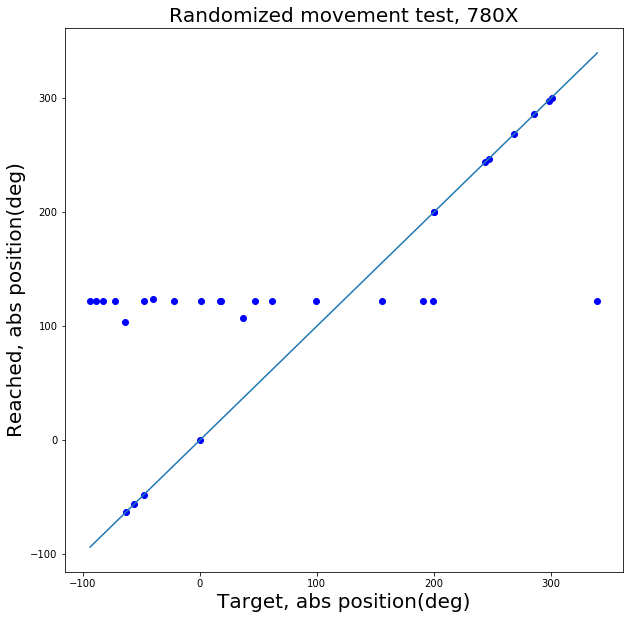

In [70]:
import matplotlib.pyplot as plt
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
plt.plot(np.insert(random_sequence,0,0),positions, 'bo');
plt.plot(values,values)
plt.title('Randomized movement test, 780X',fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Reached, abs position(deg)',fontsize=20)
plt.savefig('Randomized_movement_test_780X.pdf')
plt.savefig('Randomized_movement_test_780X.png')
plt.show()

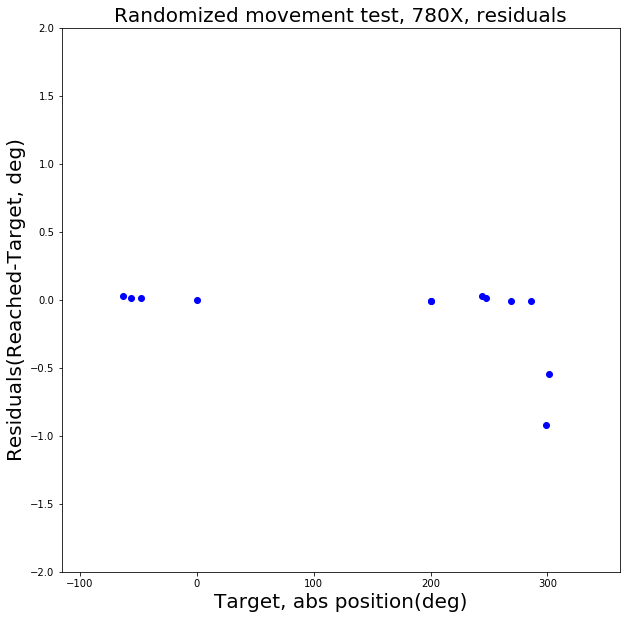

In [75]:
import matplotlib.pyplot as plt
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
plt.plot(np.insert(random_sequence,0,0),positions-np.insert(random_sequence,0,0), 'bo');
plt.title('Randomized movement test, 780X, residuals',fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Residuals(Reached-Target, deg)',fontsize=20)
plt.ylim(-2,2)
plt.savefig('Randomized_movement_test_780X,residuals.pdf')
plt.savefig('Randomized_movement_test_780X,residuals.png')
plt.show()

In [4]:
# Testing Y axis
import numpy as np
test_channel=1
random_sequence=np.random.randint(0,500,40)
print random_sequence

[299 497 303 262 392 367  54 133 205 215 347 444 108 171 186 155 366  94
 307 233 121 414 206 252 393 428 475  89 317 185 263  80 349  27  57  26
 260 105 399 129]


In [5]:
positions=[]
mc.move_abs(test_channel,np.median(random_sequence)) #move it back to zero.
positions.append(mc.getPosition(test_channel))
for i in random_sequence:
    mc.move_abs(test_channel,i)
    new_position=mc.getPosition(test_channel)
    positions.append(new_position)
print positions

INFO - Channel: 1 position: 99.931640625
INFO - avg_steps: 2708.79882812
INFO - Channel: 1 position: 99.931640625
INFO - Response: ''

INFO - Sending next command(17): '2PR1896\r\n'


780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 146.469726562
INFO - Response: ''

INFO - Sending next command(18): '2PR1277\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 174.287109375
INFO - Response: ''

INFO - Sending next command(19): '2PR907\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 190.239257812
INFO - Response: ''

INFO - Sending next command(20): '2PR695\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 201.357421875
INFO - Response: ''

INFO - Sending next command(21): '2PR547\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 210.322265625
INFO - Response: ''

INFO - Sending next command(22): '2PR428\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 217.265625
INFO - Response: ''

INFO - Sending next command(23): '2PR336\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 223.330078125
INFO - Response: ''

INFO - Sending next command(24): '2PR255\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 228.120117188
INFO - Response: ''

INFO - Sending next command(25): '2PR191\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 231.811523438
INFO - Response: ''

INFO - Sending next command(26): '2PR142\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 234.66796875
INFO - Response: ''

INFO - Sending next command(27): '2PR104\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 236.733398438
INFO - Response: ''

INFO - Sending next command(28): '2PR77\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 238.359375
INFO - Response: ''

INFO - Sending next command(29): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 239.633789062
INFO - Response: ''

INFO - Sending next command(30): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 240.600585938
INFO - Response: ''

INFO - Sending next command(31): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 241.303710938
INFO - Response: ''

INFO - Sending next command(32): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 241.787109375
INFO - Response: ''

INFO - Sending next command(33): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.05078125
INFO - Response: ''

INFO - Sending next command(34): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.2265625
INFO - Response: ''

INFO - Sending next command(35): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.358398438
INFO - Response: ''

INFO - Sending next command(36): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 242.40234375
INFO - New motor position is 242.40234375 deg, error -0.09765625 deg.
INFO - Channel: 1 position: 242.40234375
INFO - Channel: 1 position: 242.40234375
INFO - avg_steps: 1075.35546875
INFO - Channel: 1 position: 242.40234375
INFO - Response: ''

INFO - Sending next command(37): '2PR753\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.948242188
INFO - Response: ''

INFO - Sending next command(38): '2PR559\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 266.791992188
INFO - Response: ''

INFO - Sending next command(39): '2PR428\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 273.69140625
INFO - Response: ''

INFO - Sending next command(40): '2PR337\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 279.096679688
INFO - Response: ''

INFO - Sending next command(41): '2PR265\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 283.227539062
INFO - Response: ''

INFO - Sending next command(42): '2PR210\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 286.391601562
INFO - Response: ''

INFO - Sending next command(43): '2PR168\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 288.80859375
INFO - Response: ''

INFO - Sending next command(44): '2PR136\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 290.786132812
INFO - Response: ''

INFO - Sending next command(45): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.456054688
INFO - Response: ''

INFO - Sending next command(46): '2PR87\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.90625
INFO - Response: ''

INFO - Sending next command(47): '2PR68\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 295.092773438
INFO - Response: ''

INFO - Sending next command(48): '2PR52\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.059570312
INFO - Response: ''

INFO - Sending next command(49): '2PR39\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.850585938
INFO - Response: ''

INFO - Sending next command(50): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 297.465820312
INFO - Response: ''

INFO - Sending next command(51): '2PR20\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 297.905273438
INFO - Response: ''

INFO - Sending next command(52): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.30078125
INFO - Response: ''

INFO - Sending next command(53): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.4765625
INFO - Response: ''

INFO - Sending next command(54): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.608398438
INFO - Response: ''

INFO - Sending next command(55): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.740234375
INFO - Response: ''

INFO - Sending next command(56): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.784179688
ERROR - Current position 298.784179688 deg. Setpoint not achieved by -0.2158203125 deg after max iterations.
INFO - Channel: 1 position: 298.784179688
INFO - Channel: 1 position: 298.784179688
INFO - avg_steps: 3766.10058594
INFO - Channel: 1 position: 298.784179688
INFO - Response: ''

INFO - Sending next command(57): '2PR2636\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 338.73046875
INFO - Response: ''

INFO - Sending next command(58): '2PR2105\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 386.71875
INFO - Response: ''

INFO - Sending next command(59): '2PR1467\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 430.83984375
INFO - Response: ''

INFO - Sending next command(60): '2PR880\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 456.372070312
INFO - Response: ''

INFO - Sending next command(61): '2PR540\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 471.708984375
INFO - Response: ''

INFO - Sending next command(62): '2PR336\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 481.245117188
INFO - Response: ''

INFO - Sending next command(63): '2PR210\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 487.485351562
INFO - Response: ''

INFO - Sending next command(64): '2PR127\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 491.352539062
INFO - Response: ''

INFO - Sending next command(65): '2PR75\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 493.637695312
INFO - Response: ''

INFO - Sending next command(66): '2PR45\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 495.087890625
INFO - Response: ''

INFO - Sending next command(67): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 495.966796875
INFO - Response: ''

INFO - Sending next command(68): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.494140625
INFO - Response: ''

INFO - Sending next command(69): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.7578125
INFO - Response: ''

INFO - Sending next command(70): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.845703125
INFO - Response: ''

INFO - Sending next command(71): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.93359375
INFO - Response: ''

INFO - Sending next command(72): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 496.977539062
INFO - New motor position is 496.977539062 deg, error -0.0224609375 deg.
INFO - Channel: 1 position: 496.977539062
INFO - Channel: 1 position: 496.977539062
INFO - avg_steps: -3685.57324219
INFO - Need to go negative. Current position 496.977539062 DEG. Setpoint 303 DEG. Steps to be taken: -4686
INFO - Response: ''

INFO - Sending next command(73): '2PR-4686\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 247.236328125
INFO - Response: ''

INFO - Sending next command(74): '2PR742\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 270.3515625
INFO - Response: ''

INFO - Sending next command(75): '2PR434\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 279.008789062
INFO - Response: ''

INFO - Sending next command(76): '2PR319\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 284.853515625
INFO - Response: ''

INFO - Sending next command(77): '2PR241\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 288.940429688
INFO - Response: ''

INFO - Sending next command(78): '2PR187\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.1484375
INFO - Response: ''

INFO - Sending next command(79): '2PR144\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 294.829101562
INFO - Response: ''

INFO - Sending next command(80): '2PR109\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.89453125
INFO - Response: ''

INFO - Sending next command(81): '2PR81\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.520507812
INFO - Response: ''

INFO - Sending next command(82): '2PR60\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 299.794921875
INFO - Response: ''

INFO - Sending next command(83): '2PR43\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 300.76171875
INFO - Response: ''

INFO - Sending next command(84): '2PR30\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 301.552734375
INFO - Response: ''

INFO - Sending next command(85): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.080078125
INFO - Response: ''

INFO - Sending next command(86): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.387695312
INFO - Response: ''

INFO - Sending next command(87): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.607421875
INFO - Response: ''

INFO - Sending next command(88): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.739257812
INFO - Response: ''

INFO - Sending next command(89): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.827148438
INFO - Response: ''

INFO - Sending next command(90): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.87109375
INFO - Response: ''

INFO - Sending next command(91): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.915039062
INFO - Response: ''

INFO - Sending next command(92): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.958984375
INFO - Response: ''

INFO - Sending next command(93): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.958984375
INFO - New motor position is 302.958984375 deg, error -0.041015625 deg.
INFO - Channel: 1 position: 302.958984375
INFO - Channel: 1 position: 302.958984375
INFO - avg_steps: -778.220703125
INFO - Need to go negative. Current position 302.958984375 DEG. Setpoint 262 DEG. Steps to be taken: -1778
INFO - Response: ''

INFO - Sending next command(94): '2PR-1778\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 209.00390625
INFO - Response: ''

INFO - Sending next command(95): '2PR705\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 234.272460938
INFO - Response: ''

INFO - Sending next command(96): '2PR369\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 243.588867188
INFO - Response: ''

INFO - Sending next command(97): '2PR245\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 249.565429688
INFO - Response: ''

INFO - Sending next command(98): '2PR165\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 253.4765625
INFO - Response: ''

INFO - Sending next command(99): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.11328125
INFO - Response: ''

INFO - Sending next command(100): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.002929688
INFO - Response: ''

INFO - Sending next command(101): '2PR53\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.365234375
INFO - Response: ''

INFO - Sending next command(102): '2PR35\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 260.33203125
INFO - Response: ''

INFO - Sending next command(103): '2PR22\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.03515625
INFO - Response: ''

INFO - Sending next command(104): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.430664062
INFO - Response: ''

INFO - Sending next command(105): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.650390625
INFO - Response: ''

INFO - Sending next command(106): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.782226562
INFO - Response: ''

INFO - Sending next command(107): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.870117188
INFO - Response: ''

INFO - Sending next command(108): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.958007812
INFO - Response: ''

INFO - Sending next command(109): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.958007812
INFO - Response: ''

INFO - Sending next command(110): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.001953125
INFO - New motor position is 262.001953125 deg, error 0.001953125 deg.
INFO - Channel: 1 position: 262.001953125
INFO - Channel: 1 position: 262.001953125
INFO - avg_steps: 2469.96289062
INFO - Channel: 1 position: 262.001953125
INFO - Response: ''

INFO - Sending next command(111): '2PR1729\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.291015625
INFO - Response: ''

INFO - Sending next command(112): '2PR1313\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.82421875
INFO - Response: ''

INFO - Sending next command(113): '2PR1026\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 332.094726562
INFO - Response: ''

INFO - Sending next command(114): '2PR797\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 348.706054688
INFO - Response: ''

INFO - Sending next command(115): '2PR576\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 362.329101562
INFO - Response: ''

INFO - Sending next command(116): '2PR395\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 372.392578125
INFO - Response: ''

INFO - Sending next command(117): '2PR261\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 379.643554688
INFO - Response: ''

INFO - Sending next command(118): '2PR164\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 384.916992188
INFO - Response: ''

INFO - Sending next command(119): '2PR94\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 388.037109375
INFO - Response: ''

INFO - Sending next command(120): '2PR53\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 389.838867188
INFO - Response: ''

INFO - Sending next command(121): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 390.893554688
INFO - Response: ''

INFO - Sending next command(122): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.508789062
INFO - Response: ''

INFO - Sending next command(123): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.772460938
INFO - Response: ''

INFO - Sending next command(124): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.860351562
INFO - Response: ''

INFO - Sending next command(125): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.948242188
INFO - Response: ''

INFO - Sending next command(126): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.9921875
INFO - New motor position is 391.9921875 deg, error -0.0078125 deg.
INFO - Channel: 1 position: 391.9921875
INFO - Channel: 1 position: 391.9921875
INFO - avg_steps: -474.8515625
INFO - Need to go negative. Current position 391.9921875 DEG. Setpoint 367 DEG. Steps to be taken: -1475
INFO - Response: ''

INFO - Sending next command(127): '2PR-1475\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 315.0
INFO - Response: ''

INFO - Sending next command(128): '2PR692\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 338.02734375
INFO - Response: ''

INFO - Sending next command(129): '2PR385\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.16796875
INFO - Response: ''

INFO - Sending next command(130): '2PR264\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 353.364257812
INFO - Response: ''

INFO - Sending next command(131): '2PR181\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 357.934570312
INFO - Response: ''

INFO - Sending next command(132): '2PR121\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 361.098632812
INFO - Response: ''

INFO - Sending next command(133): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 363.208007812
INFO - Response: ''

INFO - Sending next command(134): '2PR50\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 364.614257812
INFO - Response: ''

INFO - Sending next command(135): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.581054688
INFO - Response: ''

INFO - Sending next command(136): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.240234375
INFO - Response: ''

INFO - Sending next command(137): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.547851562
INFO - Response: ''

INFO - Sending next command(138): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.767578125
INFO - Response: ''

INFO - Sending next command(139): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.85546875
INFO - Response: ''

INFO - Sending next command(140): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.899414062
INFO - Response: ''

INFO - Sending next command(141): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.943359375
INFO - Response: ''

INFO - Sending next command(142): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.943359375
INFO - Response: ''

INFO - Sending next command(143): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 366.987304688
INFO - New motor position is 366.987304688 deg, error -0.0126953125 deg.
INFO - Channel: 1 position: 366.987304688
INFO - Channel: 1 position: 366.987304688
INFO - avg_steps: -5946.75878906
INFO - Need to go negative. Current position 366.987304688 DEG. Setpoint 54 DEG. Steps to be taken: -6947
INFO - Response: ''

INFO - Sending next command(144): '2PR-6947\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 8.876953125
INFO - Response: ''

INFO - Sending next command(145): '2PR600\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 33.1787109375
INFO - Response: ''

INFO - Sending next command(146): '2PR277\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 40.95703125
INFO - Response: ''

INFO - Sending next command(147): '2PR173\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 45.2197265625
INFO - Response: ''

INFO - Sending next command(148): '2PR117\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 47.98828125
INFO - Response: ''

INFO - Sending next command(149): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 49.8779296875
INFO - Response: ''

INFO - Sending next command(150): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 51.1962890625
INFO - Response: ''

INFO - Sending next command(151): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 52.1630859375
INFO - Response: ''

INFO - Sending next command(152): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 52.7783203125
INFO - Response: ''

INFO - Sending next command(153): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.2177734375
INFO - Response: ''

INFO - Sending next command(154): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.4814453125
INFO - Response: ''

INFO - Sending next command(155): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.6572265625
INFO - Response: ''

INFO - Sending next command(156): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.7451171875
INFO - Response: ''

INFO - Sending next command(157): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.8330078125
INFO - Response: ''

INFO - Sending next command(158): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.876953125
INFO - Response: ''

INFO - Sending next command(159): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.9208984375
INFO - Response: ''

INFO - Sending next command(160): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.9208984375
INFO - Response: ''

INFO - Sending next command(161): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.96484375
INFO - Response: ''

INFO - Sending next command(162): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 53.96484375
INFO - Response: ''

INFO - Sending next command(163): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 54.0087890625
INFO - New motor position is 54.0087890625 deg, error 0.0087890625 deg.
INFO - Channel: 1 position: 54.0087890625
INFO - Channel: 1 position: 54.0087890625
INFO - avg_steps: 1500.83300781
INFO - Channel: 1 position: 54.0087890625
INFO - Response: ''

INFO - Sending next command(164): '2PR1051\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 70.4443359375
INFO - Response: ''

INFO - Sending next command(165): '2PR832\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 81.4306640625
INFO - Response: ''

INFO - Sending next command(166): '2PR686\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 89.6484375
INFO - Response: ''

INFO - Sending next command(167): '2PR577\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 96.15234375
INFO - Response: ''

INFO - Sending next command(168): '2PR490\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 101.821289062
INFO - Response: ''

INFO - Sending next command(169): '2PR415\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.831054688
INFO - Response: ''

INFO - Sending next command(170): '2PR348\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 111.4453125
INFO - Response: ''

INFO - Sending next command(171): '2PR287\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 115.048828125
INFO - Response: ''

INFO - Sending next command(172): '2PR239\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 117.553710938
INFO - Response: ''

INFO - Sending next command(173): '2PR205\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.575195312
INFO - Response: ''

INFO - Sending next command(174): '2PR179\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 121.333007812
INFO - Response: ''

INFO - Sending next command(175): '2PR155\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 122.958984375
INFO - Response: ''

INFO - Sending next command(176): '2PR134\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 124.584960938
INFO - Response: ''

INFO - Sending next command(177): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 126.03515625
INFO - Response: ''

INFO - Sending next command(178): '2PR93\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 127.265625
INFO - Response: ''

INFO - Sending next command(179): '2PR76\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.3203125
INFO - Response: ''

INFO - Sending next command(180): '2PR62\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 129.19921875
INFO - Response: ''

INFO - Sending next command(181): '2PR51\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 129.946289062
INFO - Response: ''

INFO - Sending next command(182): '2PR41\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 130.561523438
INFO - Response: ''

INFO - Sending next command(183): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 131.1328125
ERROR - Current position 131.1328125 deg. Setpoint not achieved by -1.8671875 deg after max iterations.
INFO - Channel: 1 position: 131.1328125
INFO - Channel: 1 position: 131.1328125
INFO - avg_steps: 1403.4765625
INFO - Channel: 1 position: 131.1328125
INFO - Response: ''

INFO - Sending next command(184): '2PR982\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 143.305664062
INFO - Response: ''

INFO - Sending next command(185): '2PR821\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 156.665039062
INFO - Response: ''

INFO - Sending next command(186): '2PR643\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 168.442382812
INFO - Response: ''

INFO - Sending next command(187): '2PR486\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 177.275390625
INFO - Response: ''

INFO - Sending next command(188): '2PR369\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.515625
INFO - Response: ''

INFO - Sending next command(189): '2PR286\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 188.4375
INFO - Response: ''

INFO - Sending next command(190): '2PR220\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 192.3046875
INFO - Response: ''

INFO - Sending next command(191): '2PR169\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 195.336914062
INFO - Response: ''

INFO - Sending next command(192): '2PR129\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 197.885742188
INFO - Response: ''

INFO - Sending next command(193): '2PR95\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 199.86328125
INFO - Response: ''

INFO - Sending next command(194): '2PR68\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 201.401367188
INFO - Response: ''

INFO - Sending next command(195): '2PR48\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 202.543945312
INFO - Response: ''

INFO - Sending next command(196): '2PR33\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 203.466796875
INFO - Response: ''

INFO - Sending next command(197): '2PR20\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.038085938
INFO - Response: ''

INFO - Sending next command(198): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.43359375
INFO - Response: ''

INFO - Sending next command(199): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.653320312
INFO - Response: ''

INFO - Sending next command(200): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.78515625
INFO - Response: ''

INFO - Sending next command(201): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.873046875
INFO - Response: ''

INFO - Sending next command(202): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.916992188
INFO - Response: ''

INFO - Sending next command(203): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.9609375
INFO - New motor position is 204.9609375 deg, error -0.0390625 deg.
INFO - Channel: 1 position: 204.9609375
INFO - Channel: 1 position: 204.9609375
INFO - avg_steps: 190.7421875
INFO - Channel: 1 position: 204.9609375
INFO - Response: ''

INFO - Sending next command(204): '2PR134\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 207.7734375
INFO - Response: ''

INFO - Sending next command(205): '2PR96\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 209.8828125
INFO - Response: ''

INFO - Sending next command(206): '2PR68\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 211.420898438
INFO - Response: ''

INFO - Sending next command(207): '2PR48\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 212.563476562
INFO - Response: ''

INFO - Sending next command(208): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 213.3984375
INFO - Response: ''

INFO - Sending next command(209): '2PR21\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 213.969726562
INFO - Response: ''

INFO - Sending next command(210): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.409179688
INFO - Response: ''

INFO - Sending next command(211): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.62890625
INFO - Response: ''

INFO - Sending next command(212): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.716796875
INFO - Response: ''

INFO - Sending next command(213): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.848632812
INFO - Response: ''

INFO - Sending next command(214): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.892578125
INFO - Response: ''

INFO - Sending next command(215): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.936523438
INFO - Response: ''

INFO - Sending next command(216): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.936523438
INFO - Response: ''

INFO - Sending next command(217): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 214.98046875
INFO - New motor position is 214.98046875 deg, error -0.01953125 deg.
INFO - Channel: 1 position: 214.98046875
INFO - Channel: 1 position: 214.98046875
INFO - avg_steps: 2508.37109375
INFO - Channel: 1 position: 214.98046875
INFO - Response: ''

INFO - Sending next command(218): '2PR1756\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 248.115234375
INFO - Response: ''

INFO - Sending next command(219): '2PR1315\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 271.845703125
INFO - Response: ''

INFO - Sending next command(220): '2PR1000\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 288.28125
INFO - Response: ''

INFO - Sending next command(221): '2PR781\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 299.619140625
INFO - Response: ''

INFO - Sending next command(222): '2PR630\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 309.506835938
INFO - Response: ''

INFO - Sending next command(223): '2PR499\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 317.28515625
INFO - Response: ''

INFO - Sending next command(224): '2PR395\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 323.349609375
INFO - Response: ''

INFO - Sending next command(225): '2PR315\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 328.18359375
INFO - Response: ''

INFO - Sending next command(226): '2PR250\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 332.75390625
INFO - Response: ''

INFO - Sending next command(227): '2PR189\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 336.4453125
INFO - Response: ''

INFO - Sending next command(228): '2PR140\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 339.169921875
INFO - Response: ''

INFO - Sending next command(229): '2PR104\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 341.3671875
INFO - Response: ''

INFO - Sending next command(230): '2PR75\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 342.94921875
INFO - Response: ''

INFO - Sending next command(231): '2PR54\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 344.1796875
INFO - Response: ''

INFO - Sending next command(232): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 345.102539062
INFO - Response: ''

INFO - Sending next command(233): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 345.76171875
INFO - Response: ''

INFO - Sending next command(234): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.245117188
INFO - Response: ''

INFO - Sending next command(235): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.46484375
INFO - Response: ''

INFO - Sending next command(236): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.684570312
INFO - Response: ''

INFO - Sending next command(237): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.772460938
ERROR - Current position 346.772460938 deg. Setpoint not achieved by -0.2275390625 deg after max iterations.
INFO - Channel: 1 position: 346.772460938
INFO - Channel: 1 position: 346.772460938
INFO - avg_steps: 1847.32324219
INFO - Channel: 1 position: 346.772460938
INFO - Response: ''

INFO - Sending next command(238): '2PR1293\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 375.46875
INFO - Response: ''

INFO - Sending next command(239): '2PR911\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 401.440429688
INFO - Response: ''

INFO - Sending next command(240): '2PR566\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 417.919921875
INFO - Response: ''

INFO - Sending next command(241): '2PR347\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 428.37890625
INFO - Response: ''

INFO - Sending next command(242): '2PR208\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 434.443359375
INFO - Response: ''

INFO - Sending next command(243): '2PR127\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 438.134765625
INFO - Response: ''

INFO - Sending next command(244): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 440.463867188
INFO - Response: ''

INFO - Sending next command(245): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 441.958007812
INFO - Response: ''

INFO - Sending next command(246): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 442.924804688
INFO - Response: ''

INFO - Sending next command(247): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.408203125
INFO - Response: ''

INFO - Sending next command(248): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.715820312
INFO - Response: ''

INFO - Sending next command(249): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.84765625
INFO - Response: ''

INFO - Sending next command(250): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.935546875
INFO - Response: ''

INFO - Sending next command(251): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.979492188
INFO - New motor position is 443.979492188 deg, error -0.0205078125 deg.
INFO - Channel: 1 position: 443.979492188
INFO - Channel: 1 position: 443.979492188
INFO - avg_steps: -6383.61035156
INFO - Need to go negative. Current position 443.979492188 DEG. Setpoint 108 DEG. Steps to be taken: -7384
INFO - Response: ''

INFO - Sending next command(252): '2PR-7384\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 59.501953125
INFO - Response: ''

INFO - Sending next command(253): '2PR645\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 84.2431640625
INFO - Response: ''

INFO - Sending next command(254): '2PR316\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 92.021484375
INFO - Response: ''

INFO - Sending next command(255): '2PR213\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 96.416015625
INFO - Response: ''

INFO - Sending next command(256): '2PR154\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 99.3603515625
INFO - Response: ''

INFO - Sending next command(257): '2PR115\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 101.557617188
INFO - Response: ''

INFO - Sending next command(258): '2PR86\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 103.18359375
INFO - Response: ''

INFO - Sending next command(259): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.458007812
INFO - Response: ''

INFO - Sending next command(260): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 105.380859375
INFO - Response: ''

INFO - Sending next command(261): '2PR35\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.083984375
INFO - Response: ''

INFO - Sending next command(262): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.611328125
INFO - Response: ''

INFO - Sending next command(263): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 106.962890625
INFO - Response: ''

INFO - Sending next command(264): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.270507812
INFO - Response: ''

INFO - Sending next command(265): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.490234375
INFO - Response: ''

INFO - Sending next command(266): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.622070312
INFO - Response: ''

INFO - Sending next command(267): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.709960938
INFO - Response: ''

INFO - Sending next command(268): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.797851562
INFO - Response: ''

INFO - Sending next command(269): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.841796875
INFO - Response: ''

INFO - Sending next command(270): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.885742188
INFO - Response: ''

INFO - Sending next command(271): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.9296875
INFO - Response: ''

INFO - Sending next command(272): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 107.9296875
INFO - New motor position is 107.9296875 deg, error -0.0703125 deg.
INFO - Channel: 1 position: 107.9296875
INFO - Channel: 1 position: 107.9296875
INFO - avg_steps: 1198.3359375
INFO - Channel: 1 position: 107.9296875
INFO - Response: ''

INFO - Sending next command(273): '2PR839\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.223632812
INFO - Response: ''

INFO - Sending next command(274): '2PR689\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 127.836914062
INFO - Response: ''

INFO - Sending next command(275): '2PR574\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 135.483398438
INFO - Response: ''

INFO - Sending next command(276): '2PR472\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 142.646484375
INFO - Response: ''

INFO - Sending next command(277): '2PR377\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 148.754882812
INFO - Response: ''

INFO - Sending next command(278): '2PR296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.204101562
INFO - Response: ''

INFO - Sending next command(279): '2PR223\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 158.247070312
INFO - Response: ''

INFO - Sending next command(280): '2PR170\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 161.586914062
INFO - Response: ''

INFO - Sending next command(281): '2PR125\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 164.1796875
INFO - Response: ''

INFO - Sending next command(282): '2PR91\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 166.157226562
INFO - Response: ''

INFO - Sending next command(283): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 167.607421875
INFO - Response: ''

INFO - Sending next command(284): '2PR45\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 168.75
INFO - Response: ''

INFO - Sending next command(285): '2PR30\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 169.62890625
INFO - Response: ''

INFO - Sending next command(286): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.15625
INFO - Response: ''

INFO - Sending next command(287): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.463867188
INFO - Response: ''

INFO - Sending next command(288): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.68359375
INFO - Response: ''

INFO - Sending next command(289): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.771484375
INFO - Response: ''

INFO - Sending next command(290): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.859375
INFO - Response: ''

INFO - Sending next command(291): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.947265625
INFO - Response: ''

INFO - Sending next command(292): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.947265625
INFO - New motor position is 170.947265625 deg, error -0.052734375 deg.
INFO - Channel: 1 position: 170.947265625
INFO - Channel: 1 position: 170.947265625
INFO - avg_steps: 286.001953125
INFO - Channel: 1 position: 170.947265625
INFO - Response: ''

INFO - Sending next command(293): '2PR200\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 175.034179688
INFO - Response: ''

INFO - Sending next command(294): '2PR146\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 177.934570312
INFO - Response: ''

INFO - Sending next command(295): '2PR107\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 180.131835938
INFO - Response: ''

INFO - Sending next command(296): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 181.845703125
INFO - Response: ''

INFO - Sending next command(297): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.208007812
INFO - Response: ''

INFO - Sending next command(298): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.21875
INFO - Response: ''

INFO - Sending next command(299): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.965820312
INFO - Response: ''

INFO - Sending next command(300): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.405273438
INFO - Response: ''

INFO - Sending next command(301): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.625
INFO - Response: ''

INFO - Sending next command(302): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.80078125
INFO - Response: ''

INFO - Sending next command(303): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.888671875
INFO - Response: ''

INFO - Sending next command(304): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.888671875
INFO - Response: ''

INFO - Sending next command(305): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.932617188
INFO - Response: ''

INFO - Sending next command(306): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.9765625
INFO - New motor position is 185.9765625 deg, error -0.0234375 deg.
INFO - Channel: 1 position: 185.9765625
INFO - Channel: 1 position: 185.9765625
INFO - avg_steps: -588.5546875
INFO - Need to go negative. Current position 185.9765625 DEG. Setpoint 155 DEG. Steps to be taken: -1589
INFO - Response: ''

INFO - Sending next command(307): '2PR-1589\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 105.46875
INFO - Response: ''

INFO - Sending next command(308): '2PR659\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 129.90234375
INFO - Response: ''

INFO - Sending next command(309): '2PR334\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 137.4609375
INFO - Response: ''

INFO - Sending next command(310): '2PR233\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 141.943359375
INFO - Response: ''

INFO - Sending next command(311): '2PR174\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 145.063476562
INFO - Response: ''

INFO - Sending next command(312): '2PR132\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 147.348632812
INFO - Response: ''

INFO - Sending next command(313): '2PR102\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 149.194335938
INFO - Response: ''

INFO - Sending next command(314): '2PR77\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 150.732421875
INFO - Response: ''

INFO - Sending next command(315): '2PR57\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.962890625
INFO - Response: ''

INFO - Sending next command(316): '2PR40\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 152.9296875
INFO - Response: ''

INFO - Sending next command(317): '2PR28\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 153.6328125
INFO - Response: ''

INFO - Sending next command(318): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.116210938
INFO - Response: ''

INFO - Sending next command(319): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.467773438
INFO - Response: ''

INFO - Sending next command(320): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.643554688
INFO - Response: ''

INFO - Sending next command(321): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.775390625
INFO - Response: ''

INFO - Sending next command(322): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.86328125
INFO - Response: ''

INFO - Sending next command(323): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.907226562
INFO - Response: ''

INFO - Sending next command(324): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.907226562
INFO - Response: ''

INFO - Sending next command(325): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.951171875
INFO - Response: ''

INFO - Sending next command(326): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.951171875
INFO - Response: ''

INFO - Sending next command(327): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 154.995117188
INFO - New motor position is 154.995117188 deg, error -0.0048828125 deg.
INFO - Channel: 1 position: 154.995117188
INFO - Channel: 1 position: 154.995117188
INFO - avg_steps: 4009.09277344
INFO - Channel: 1 position: 154.995117188
INFO - Response: ''

INFO - Sending next command(328): '2PR2806\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 203.90625
INFO - Response: ''

INFO - Sending next command(329): '2PR2156\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 243.45703125
INFO - Response: ''

INFO - Sending next command(330): '2PR1630\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 273.779296875
INFO - Response: ''

INFO - Sending next command(331): '2PR1227\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.587890625
INFO - Response: ''

INFO - Sending next command(332): '2PR976\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.73828125
INFO - Response: ''

INFO - Sending next command(333): '2PR788\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 318.208007812
INFO - Response: ''

INFO - Sending next command(334): '2PR636\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 326.909179688
INFO - Response: ''

INFO - Sending next command(335): '2PR520\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 335.654296875
INFO - Response: ''

INFO - Sending next command(336): '2PR404\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 343.081054688
INFO - Response: ''

INFO - Sending next command(337): '2PR305\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 348.837890625
INFO - Response: ''

INFO - Sending next command(338): '2PR228\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 353.452148438
INFO - Response: ''

INFO - Sending next command(339): '2PR167\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 356.967773438
INFO - Response: ''

INFO - Sending next command(340): '2PR120\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 359.560546875
INFO - Response: ''

INFO - Sending next command(341): '2PR86\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 361.538085938
INFO - Response: ''

INFO - Sending next command(342): '2PR59\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 362.944335938
INFO - Response: ''

INFO - Sending next command(343): '2PR41\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 363.999023438
INFO - Response: ''

INFO - Sending next command(344): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 364.790039062
INFO - Response: ''

INFO - Sending next command(345): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.2734375
INFO - Response: ''

INFO - Sending next command(346): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.537109375
INFO - Response: ''

INFO - Sending next command(347): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.712890625
ERROR - Current position 365.712890625 deg. Setpoint not achieved by -0.287109375 deg after max iterations.
INFO - Channel: 1 position: 365.712890625
INFO - Channel: 1 position: 365.712890625
INFO - avg_steps: -5162.54492188
INFO - Need to go negative. Current position 365.712890625 DEG. Setpoint 94 DEG. Steps to be taken: -6163
INFO - Response: ''

INFO - Sending next command(348): '2PR-6163\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 52.3388671875
INFO - Response: ''

INFO - Sending next command(349): '2PR554\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 74.7509765625
INFO - Response: ''

INFO - Sending next command(350): '2PR256\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 81.826171875
INFO - Response: ''

INFO - Sending next command(351): '2PR162\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 85.5615234375
INFO - Response: ''

INFO - Sending next command(352): '2PR112\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 87.978515625
INFO - Response: ''

INFO - Sending next command(353): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 89.6484375
INFO - Response: ''

INFO - Sending next command(354): '2PR58\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 90.8349609375
INFO - Response: ''

INFO - Sending next command(355): '2PR42\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 91.7138671875
INFO - Response: ''

INFO - Sending next command(356): '2PR30\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 92.373046875
INFO - Response: ''

INFO - Sending next command(357): '2PR22\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 92.8125
INFO - Response: ''

INFO - Sending next command(358): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.1640625
INFO - Response: ''

INFO - Sending next command(359): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.33984375
INFO - Response: ''

INFO - Sending next command(360): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.515625
INFO - Response: ''

INFO - Sending next command(361): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.6474609375
INFO - Response: ''

INFO - Sending next command(362): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.7353515625
INFO - Response: ''

INFO - Sending next command(363): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.8232421875
INFO - Response: ''

INFO - Sending next command(364): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.8232421875
INFO - Response: ''

INFO - Sending next command(365): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.8671875
INFO - Response: ''

INFO - Sending next command(366): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.9111328125
INFO - Response: ''

INFO - Sending next command(367): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.9111328125
INFO - Response: ''

INFO - Sending next command(368): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 93.955078125
INFO - New motor position is 93.955078125 deg, error -0.044921875 deg.
INFO - Channel: 1 position: 93.955078125
INFO - Channel: 1 position: 93.955078125
INFO - avg_steps: 4047.85351562
INFO - Channel: 1 position: 93.955078125
INFO - Response: ''

INFO - Sending next command(369): '2PR2833\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 124.453125
INFO - Response: ''

INFO - Sending next command(370): '2PR2428\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 155.786132812
INFO - Response: ''

INFO - Sending next command(371): '2PR2011\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 190.634765625
INFO - Response: ''

INFO - Sending next command(372): '2PR1548\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 217.397460938
INFO - Response: ''

INFO - Sending next command(373): '2PR1192\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 240.556640625
INFO - Response: ''

INFO - Sending next command(374): '2PR884\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 257.651367188
INFO - Response: ''

INFO - Sending next command(375): '2PR656\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 269.692382812
INFO - Response: ''

INFO - Sending next command(376): '2PR496\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 278.349609375
INFO - Response: ''

INFO - Sending next command(377): '2PR381\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 284.721679688
INFO - Response: ''

INFO - Sending next command(378): '2PR296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 289.51171875
INFO - Response: ''

INFO - Sending next command(379): '2PR233\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.334960938
INFO - Response: ''

INFO - Sending next command(380): '2PR182\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.3671875
INFO - Response: ''

INFO - Sending next command(381): '2PR141\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.740234375
INFO - Response: ''

INFO - Sending next command(382): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 300.673828125
INFO - Response: ''

INFO - Sending next command(383): '2PR84\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 302.211914062
INFO - Response: ''

INFO - Sending next command(384): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 303.486328125
INFO - Response: ''

INFO - Sending next command(385): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 304.497070312
INFO - Response: ''

INFO - Sending next command(386): '2PR33\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 305.288085938
INFO - Response: ''

INFO - Sending next command(387): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 305.859375
INFO - Response: ''

INFO - Sending next command(388): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.254882812
ERROR - Current position 306.254882812 deg. Setpoint not achieved by -0.7451171875 deg after max iterations.
INFO - Channel: 1 position: 306.254882812
INFO - Channel: 1 position: 306.254882812
INFO - avg_steps: -1391.84277344
INFO - Need to go negative. Current position 306.254882812 DEG. Setpoint 233 DEG. Steps to be taken: -2392
INFO - Response: ''

INFO - Sending next command(389): '2PR-2392\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 179.077148438
INFO - Response: ''

INFO - Sending next command(390): '2PR717\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 206.3671875
INFO - Response: ''

INFO - Sending next command(391): '2PR354\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 215.419921875
INFO - Response: ''

INFO - Sending next command(392): '2PR234\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 220.913085938
INFO - Response: ''

INFO - Sending next command(393): '2PR161\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 224.47265625
INFO - Response: ''

INFO - Sending next command(394): '2PR113\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 227.065429688
INFO - Response: ''

INFO - Sending next command(395): '2PR79\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 228.955078125
INFO - Response: ''

INFO - Sending next command(396): '2PR54\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 230.2734375
INFO - Response: ''

INFO - Sending next command(397): '2PR36\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 231.284179688
INFO - Response: ''

INFO - Sending next command(398): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 231.943359375
INFO - Response: ''

INFO - Sending next command(399): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.3828125
INFO - Response: ''

INFO - Sending next command(400): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.602539062
INFO - Response: ''

INFO - Sending next command(401): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.734375
INFO - Response: ''

INFO - Sending next command(402): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.866210938
INFO - Response: ''

INFO - Sending next command(403): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.91015625
INFO - Response: ''

INFO - Sending next command(404): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.954101562
INFO - Response: ''

INFO - Sending next command(405): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.954101562
INFO - Response: ''

INFO - Sending next command(406): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.998046875
INFO - New motor position is 232.998046875 deg, error -0.001953125 deg.
INFO - Channel: 1 position: 232.998046875
INFO - Channel: 1 position: 232.998046875
INFO - avg_steps: -2127.96289062
INFO - Need to go negative. Current position 232.998046875 DEG. Setpoint 121 DEG. Steps to be taken: -3128
INFO - Response: ''

INFO - Sending next command(407): '2PR-3128\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 71.5869140625
INFO - Response: ''

INFO - Sending next command(408): '2PR657\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 97.2509765625
INFO - Response: ''

INFO - Sending next command(409): '2PR316\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.985351562
INFO - Response: ''

INFO - Sending next command(410): '2PR213\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 109.248046875
INFO - Response: ''

INFO - Sending next command(411): '2PR156\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 112.104492188
INFO - Response: ''

INFO - Sending next command(412): '2PR118\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 114.038085938
INFO - Response: ''

INFO - Sending next command(413): '2PR93\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 115.400390625
INFO - Response: ''

INFO - Sending next command(414): '2PR74\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 116.455078125
INFO - Response: ''

INFO - Sending next command(415): '2PR60\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 117.333984375
INFO - Response: ''

INFO - Sending next command(416): '2PR49\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 117.993164062
INFO - Response: ''

INFO - Sending next command(417): '2PR40\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 118.65234375
INFO - Response: ''

INFO - Sending next command(418): '2PR31\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.1796875
INFO - Response: ''

INFO - Sending next command(419): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.575195312
INFO - Response: ''

INFO - Sending next command(420): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 119.8828125
INFO - Response: ''

INFO - Sending next command(421): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.102539062
INFO - Response: ''

INFO - Sending next command(422): '2PR12\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.322265625
INFO - Response: ''

INFO - Sending next command(423): '2PR9\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.454101562
INFO - Response: ''

INFO - Sending next command(424): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.541992188
INFO - Response: ''

INFO - Sending next command(425): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.629882812
INFO - Response: ''

INFO - Sending next command(426): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.717773438
INFO - Response: ''

INFO - Sending next command(427): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 120.76171875
ERROR - Current position 120.76171875 deg. Setpoint not achieved by -0.23828125 deg after max iterations.
INFO - Channel: 1 position: 120.76171875
INFO - Channel: 1 position: 120.76171875
INFO - avg_steps: 5571.52734375
INFO - Channel: 1 position: 120.76171875
INFO - Response: ''

INFO - Sending next command(428): '2PR3900\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 176.000976562
INFO - Response: ''

INFO - Sending next command(429): '2PR3165\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 224.340820312
INFO - Response: ''

INFO - Sending next command(430): '2PR2522\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 265.913085938
INFO - Response: ''

INFO - Sending next command(431): '2PR1970\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 293.203125
INFO - Response: ''

INFO - Sending next command(432): '2PR1607\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.384765625
INFO - Response: ''

INFO - Sending next command(433): '2PR1325\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 329.985351562
INFO - Response: ''

INFO - Sending next command(434): '2PR1117\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.255859375
INFO - Response: ''

INFO - Sending next command(435): '2PR888\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 362.329101562
INFO - Response: ''

INFO - Sending next command(436): '2PR687\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 375.249023438
INFO - Response: ''

INFO - Sending next command(437): '2PR515\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 387.817382812
INFO - Response: ''

INFO - Sending next command(438): '2PR348\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 396.518554688
INFO - Response: ''

INFO - Sending next command(439): '2PR233\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 402.407226562
INFO - Response: ''

INFO - Sending next command(440): '2PR154\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 406.40625
INFO - Response: ''

INFO - Sending next command(441): '2PR101\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 409.130859375
INFO - Response: ''

INFO - Sending next command(442): '2PR65\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 410.9765625
INFO - Response: ''

INFO - Sending next command(443): '2PR40\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 412.163085938
INFO - Response: ''

INFO - Sending next command(444): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 412.998046875
INFO - Response: ''

INFO - Sending next command(445): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 413.4375
INFO - Response: ''

INFO - Sending next command(446): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 413.657226562
INFO - Response: ''

INFO - Sending next command(447): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 413.833007812
ERROR - Current position 413.833007812 deg. Setpoint not achieved by -0.1669921875 deg after max iterations.
INFO - Channel: 1 position: 413.833007812
INFO - Channel: 1 position: 413.833007812
INFO - avg_steps: -3948.82714844
INFO - Need to go negative. Current position 413.833007812 DEG. Setpoint 206 DEG. Steps to be taken: -4949
INFO - Response: ''

INFO - Sending next command(448): '2PR-4949\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.567382812
INFO - Response: ''

INFO - Sending next command(449): '2PR724\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 180.131835938
INFO - Response: ''

INFO - Sending next command(450): '2PR344\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 189.008789062
INFO - Response: ''

INFO - Sending next command(451): '2PR226\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 193.798828125
INFO - Response: ''

INFO - Sending next command(452): '2PR162\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 197.094726562
INFO - Response: ''

INFO - Sending next command(453): '2PR118\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 199.643554688
INFO - Response: ''

INFO - Sending next command(454): '2PR85\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 201.489257812
INFO - Response: ''

INFO - Sending next command(455): '2PR60\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 202.8515625
INFO - Response: ''

INFO - Sending next command(456): '2PR42\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 203.862304688
INFO - Response: ''

INFO - Sending next command(457): '2PR28\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.609375
INFO - Response: ''

INFO - Sending next command(458): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.13671875
INFO - Response: ''

INFO - Sending next command(459): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.48828125
INFO - Response: ''

INFO - Sending next command(460): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.6640625
INFO - Response: ''

INFO - Sending next command(461): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.795898438
INFO - Response: ''

INFO - Sending next command(462): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.883789062
INFO - Response: ''

INFO - Sending next command(463): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.927734375
INFO - Response: ''

INFO - Sending next command(464): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.971679688
INFO - Response: ''

INFO - Sending next command(465): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 205.971679688
INFO - Response: ''

INFO - Sending next command(466): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 206.015625
INFO - New motor position is 206.015625 deg, error 0.015625 deg.
INFO - Channel: 1 position: 206.015625
INFO - Channel: 1 position: 206.015625
INFO - avg_steps: 873.703125
INFO - Channel: 1 position: 206.015625
INFO - Response: ''

INFO - Sending next command(467): '2PR612\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 218.540039062
INFO - Response: ''

INFO - Sending next command(468): '2PR445\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 228.120117188
INFO - Response: ''

INFO - Sending next command(469): '2PR318\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 234.975585938
INFO - Response: ''

INFO - Sending next command(470): '2PR226\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 239.721679688
INFO - Response: ''

INFO - Sending next command(471): '2PR163\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 243.413085938
INFO - Response: ''

INFO - Sending next command(472): '2PR114\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 246.005859375
INFO - Response: ''

INFO - Sending next command(473): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 247.895507812
INFO - Response: ''

INFO - Sending next command(474): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 249.301757812
INFO - Response: ''

INFO - Sending next command(475): '2PR36\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 250.268554688
INFO - Response: ''

INFO - Sending next command(476): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 250.927734375
INFO - Response: ''

INFO - Sending next command(477): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.3671875
INFO - Response: ''

INFO - Sending next command(478): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.586914062
INFO - Response: ''

INFO - Sending next command(479): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.71875
INFO - Response: ''

INFO - Sending next command(480): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.850585938
INFO - Response: ''

INFO - Sending next command(481): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.89453125
INFO - Response: ''

INFO - Sending next command(482): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.89453125
INFO - Response: ''

INFO - Sending next command(483): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.938476562
INFO - Response: ''

INFO - Sending next command(484): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.982421875
INFO - New motor position is 251.982421875 deg, error -0.017578125 deg.
INFO - Channel: 1 position: 251.982421875
INFO - Channel: 1 position: 251.982421875
INFO - avg_steps: 2679.33398438
INFO - Channel: 1 position: 251.982421875
INFO - Response: ''

INFO - Sending next command(485): '2PR1876\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 285.161132812
INFO - Response: ''

INFO - Sending next command(486): '2PR1434\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.782226562
INFO - Response: ''

INFO - Sending next command(487): '2PR1147\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 323.26171875
INFO - Response: ''

INFO - Sending next command(488): '2PR928\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 336.665039062
INFO - Response: ''

INFO - Sending next command(489): '2PR749\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 349.1015625
INFO - Response: ''

INFO - Sending next command(490): '2PR584\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 359.428710938
INFO - Response: ''

INFO - Sending next command(491): '2PR446\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 367.602539062
INFO - Response: ''

INFO - Sending next command(492): '2PR338\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 373.930664062
INFO - Response: ''

INFO - Sending next command(493): '2PR254\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 379.3359375
INFO - Response: ''

INFO - Sending next command(494): '2PR182\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 383.994140625
INFO - Response: ''

INFO - Sending next command(495): '2PR120\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 387.114257812
INFO - Response: ''

INFO - Sending next command(496): '2PR78\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 389.223632812
INFO - Response: ''

INFO - Sending next command(497): '2PR50\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 390.5859375
INFO - Response: ''

INFO - Sending next command(498): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 391.552734375
INFO - Response: ''

INFO - Sending next command(499): '2PR19\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.16796875
INFO - Response: ''

INFO - Sending next command(500): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.51953125
INFO - Response: ''

INFO - Sending next command(501): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.6953125
INFO - Response: ''

INFO - Sending next command(502): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.827148438
INFO - Response: ''

INFO - Sending next command(503): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.87109375
INFO - Response: ''

INFO - Sending next command(504): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.915039062
INFO - New motor position is 392.915039062 deg, error -0.0849609375 deg.
INFO - Channel: 1 position: 392.915039062
INFO - Channel: 1 position: 392.915039062
INFO - avg_steps: 666.614257812
INFO - Channel: 1 position: 392.915039062
INFO - Response: ''

INFO - Sending next command(505): '2PR467\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 404.604492188
INFO - Response: ''

INFO - Sending next command(506): '2PR311\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 412.866210938
INFO - Response: ''

INFO - Sending next command(507): '2PR201\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 418.579101562
INFO - Response: ''

INFO - Sending next command(508): '2PR125\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 422.2265625
INFO - Response: ''

INFO - Sending next command(509): '2PR77\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 424.467773438
INFO - Response: ''

INFO - Sending next command(510): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 425.91796875
INFO - Response: ''

INFO - Sending next command(511): '2PR28\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 426.884765625
INFO - Response: ''

INFO - Sending next command(512): '2PR15\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.456054688
INFO - Response: ''

INFO - Sending next command(513): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.67578125
INFO - Response: ''

INFO - Sending next command(514): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.807617188
INFO - Response: ''

INFO - Sending next command(515): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.895507812
INFO - Response: ''

INFO - Sending next command(516): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.939453125
INFO - Response: ''

INFO - Sending next command(517): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 427.983398438
INFO - New motor position is 427.983398438 deg, error -0.0166015625 deg.
INFO - Channel: 1 position: 427.983398438
INFO - Channel: 1 position: 427.983398438
INFO - avg_steps: 893.315429688
INFO - Channel: 1 position: 427.983398438
INFO - Response: ''

INFO - Sending next command(518): '2PR625\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 443.540039062
INFO - Response: ''

INFO - Sending next command(519): '2PR418\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 453.33984375
INFO - Response: ''

INFO - Sending next command(520): '2PR288\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 459.84375
INFO - Response: ''

INFO - Sending next command(521): '2PR202\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 464.370117188
INFO - Response: ''

INFO - Sending next command(522): '2PR141\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 467.666015625
INFO - Response: ''

INFO - Sending next command(523): '2PR98\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 469.995117188
INFO - Response: ''

INFO - Sending next command(524): '2PR67\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 471.62109375
INFO - Response: ''

INFO - Sending next command(525): '2PR45\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 472.8515625
INFO - Response: ''

INFO - Sending next command(526): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 473.774414062
INFO - Response: ''

INFO - Sending next command(527): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.2578125
INFO - Response: ''

INFO - Sending next command(528): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.609375
INFO - Response: ''

INFO - Sending next command(529): '2PR5\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.741210938
INFO - Response: ''

INFO - Sending next command(530): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.829101562
INFO - Response: ''

INFO - Sending next command(531): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.873046875
INFO - Response: ''

INFO - Sending next command(532): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.9609375
INFO - Response: ''

INFO - Sending next command(533): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 474.9609375
INFO - Response: ''

INFO - Sending next command(534): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 475.004882812
INFO - New motor position is 475.004882812 deg, error 0.0048828125 deg.
INFO - Channel: 1 position: 475.004882812
INFO - Channel: 1 position: 475.004882812
INFO - avg_steps: -7334.09277344
INFO - Need to go negative. Current position 475.004882812 DEG. Setpoint 89 DEG. Steps to be taken: -8334
INFO - Response: ''

INFO - Sending next command(535): '2PR-8334\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 45.966796875
INFO - Response: ''

INFO - Sending next command(536): '2PR572\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 81.38671875
INFO - Response: ''

INFO - Sending next command(537): '2PR101\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 87.71484375
INFO - Response: ''

INFO - Sending next command(538): '2PR17\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 88.9013671875
INFO - Response: ''

INFO - Sending next command(539): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 88.9453125
INFO - Response: ''

INFO - Sending next command(540): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 88.9892578125
INFO - New motor position is 88.9892578125 deg, error -0.0107421875 deg.
INFO - Channel: 1 position: 88.9892578125
INFO - Channel: 1 position: 88.9892578125
INFO - avg_steps: 4332.20410156
INFO - Channel: 1 position: 88.9892578125
INFO - Response: ''

INFO - Sending next command(541): '2PR3033\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.34765625
INFO - Response: ''

INFO - Sending next command(542): '2PR2203\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 186.196289062
INFO - Response: ''

INFO - Sending next command(543): '2PR1740\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 213.92578125
INFO - Response: ''

INFO - Sending next command(544): '2PR1371\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 238.491210938
INFO - Response: ''

INFO - Sending next command(545): '2PR1044\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.684570312
INFO - Response: ''

INFO - Sending next command(546): '2PR802\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 270.0
INFO - Response: ''

INFO - Sending next command(547): '2PR625\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 279.536132812
INFO - Response: ''

INFO - Sending next command(548): '2PR498\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 286.5234375
INFO - Response: ''

INFO - Sending next command(549): '2PR405\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 292.060546875
INFO - Response: ''

INFO - Sending next command(550): '2PR332\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 296.762695312
INFO - Response: ''

INFO - Sending next command(551): '2PR269\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 300.541992188
INFO - Response: ''

INFO - Sending next command(552): '2PR219\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 303.837890625
INFO - Response: ''

INFO - Sending next command(553): '2PR175\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 306.650390625
INFO - Response: ''

INFO - Sending next command(554): '2PR138\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 308.891601562
INFO - Response: ''

INFO - Sending next command(555): '2PR108\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 310.737304688
INFO - Response: ''

INFO - Sending next command(556): '2PR83\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 312.1875
INFO - Response: ''

INFO - Sending next command(557): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 313.286132812
INFO - Response: ''

INFO - Sending next command(558): '2PR49\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.165039062
INFO - Response: ''

INFO - Sending next command(559): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 314.956054688
INFO - Response: ''

INFO - Sending next command(560): '2PR27\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 315.52734375
ERROR - Current position 315.52734375 deg. Setpoint not achieved by -1.47265625 deg after max iterations.
INFO - Channel: 1 position: 315.52734375
INFO - Channel: 1 position: 315.52734375
INFO - avg_steps: -2480.01953125
INFO - Need to go negative. Current position 315.52734375 DEG. Setpoint 185 DEG. Steps to be taken: -3480
INFO - Response: ''

INFO - Sending next command(561): '2PR-3480\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 134.033203125
INFO - Response: ''

INFO - Sending next command(562): '2PR678\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 162.158203125
INFO - Response: ''

INFO - Sending next command(563): '2PR304\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 170.859375
INFO - Response: ''

INFO - Sending next command(564): '2PR188\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 175.4296875
INFO - Response: ''

INFO - Sending next command(565): '2PR127\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 178.154296875
INFO - Response: ''

INFO - Sending next command(566): '2PR91\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 180.131835938
INFO - Response: ''

INFO - Sending next command(567): '2PR65\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 181.538085938
INFO - Response: ''

INFO - Sending next command(568): '2PR46\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 182.592773438
INFO - Response: ''

INFO - Sending next command(569): '2PR32\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.427734375
INFO - Response: ''

INFO - Sending next command(570): '2PR21\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 183.999023438
INFO - Response: ''

INFO - Sending next command(571): '2PR13\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.39453125
INFO - Response: ''

INFO - Sending next command(572): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.5703125
INFO - Response: ''

INFO - Sending next command(573): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.74609375
INFO - Response: ''

INFO - Sending next command(574): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.833984375
INFO - Response: ''

INFO - Sending next command(575): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.877929688
INFO - Response: ''

INFO - Sending next command(576): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.921875
INFO - Response: ''

INFO - Sending next command(577): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.965820312
INFO - Response: ''

INFO - Sending next command(578): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 184.965820312
INFO - Response: ''

INFO - Sending next command(579): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 185.009765625
INFO - New motor position is 185.009765625 deg, error 0.009765625 deg.
INFO - Channel: 1 position: 185.009765625
INFO - Channel: 1 position: 185.009765625
INFO - avg_steps: 1481.81445312
INFO - Channel: 1 position: 185.009765625
INFO - Response: ''

INFO - Sending next command(580): '2PR1037\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 204.43359375
INFO - Response: ''

INFO - Sending next command(581): '2PR779\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 220.341796875
INFO - Response: ''

INFO - Sending next command(582): '2PR567\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 232.514648438
INFO - Response: ''

INFO - Sending next command(583): '2PR405\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 240.732421875
INFO - Response: ''

INFO - Sending next command(584): '2PR296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 247.016601562
INFO - Response: ''

INFO - Sending next command(585): '2PR213\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.54296875
INFO - Response: ''

INFO - Sending next command(586): '2PR152\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 254.750976562
INFO - Response: ''

INFO - Sending next command(587): '2PR110\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 257.036132812
INFO - Response: ''

INFO - Sending next command(588): '2PR79\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.837890625
INFO - Response: ''

INFO - Sending next command(589): '2PR55\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 260.112304688
INFO - Response: ''

INFO - Sending next command(590): '2PR38\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.123046875
INFO - Response: ''

INFO - Sending next command(591): '2PR25\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 261.782226562
INFO - Response: ''

INFO - Sending next command(592): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.265625
INFO - Response: ''

INFO - Sending next command(593): '2PR10\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.529296875
INFO - Response: ''

INFO - Sending next command(594): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.705078125
INFO - Response: ''

INFO - Sending next command(595): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.79296875
INFO - Response: ''

INFO - Sending next command(596): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.880859375
INFO - Response: ''

INFO - Sending next command(597): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.924804688
INFO - Response: ''

INFO - Sending next command(598): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.96875
INFO - Response: ''

INFO - Sending next command(599): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 262.96875
INFO - New motor position is 262.96875 deg, error -0.03125 deg.
INFO - Channel: 1 position: 262.96875
INFO - Channel: 1 position: 262.96875
INFO - avg_steps: -3476.40625
INFO - Need to go negative. Current position 262.96875 DEG. Setpoint 80 DEG. Steps to be taken: -4476
INFO - Response: ''

INFO - Sending next command(600): '2PR-4476\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 33.3544921875
INFO - Response: ''

INFO - Sending next command(601): '2PR620\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 71.4111328125
INFO - Response: ''

INFO - Sending next command(602): '2PR114\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 78.7939453125
INFO - Response: ''

INFO - Sending next command(603): '2PR16\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 79.9365234375
INFO - Response: ''

INFO - Sending next command(604): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 80.0244140625
INFO - New motor position is 80.0244140625 deg, error 0.0244140625 deg.
INFO - Channel: 1 position: 80.0244140625
INFO - Channel: 1 position: 80.0244140625
INFO - avg_steps: 5110.53613281
INFO - Channel: 1 position: 80.0244140625
INFO - Response: ''

INFO - Sending next command(605): '2PR3577\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 178.989257812
INFO - Response: ''

INFO - Sending next command(606): '2PR2261\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 218.452148438
INFO - Response: ''

INFO - Sending next command(607): '2PR1736\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 251.54296875
INFO - Response: ''

INFO - Sending next command(608): '2PR1296\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 273.295898438
INFO - Response: ''

INFO - Sending next command(609): '2PR1007\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 287.314453125
INFO - Response: ''

INFO - Sending next command(610): '2PR820\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 298.564453125
INFO - Response: ''

INFO - Sending next command(611): '2PR671\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 308.49609375
INFO - Response: ''

INFO - Sending next command(612): '2PR539\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 316.23046875
INFO - Response: ''

INFO - Sending next command(613): '2PR436\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 321.811523438
INFO - Response: ''

INFO - Sending next command(614): '2PR362\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 326.25
INFO - Response: ''

INFO - Sending next command(615): '2PR303\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 330.688476562
INFO - Response: ''

INFO - Sending next command(616): '2PR244\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 334.775390625
INFO - Response: ''

INFO - Sending next command(617): '2PR189\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 338.02734375
INFO - Response: ''

INFO - Sending next command(618): '2PR146\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 340.6640625
INFO - Response: ''

INFO - Sending next command(619): '2PR111\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 342.685546875
INFO - Response: ''

INFO - Sending next command(620): '2PR84\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 344.223632812
INFO - Response: ''

INFO - Sending next command(621): '2PR64\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 345.454101562
INFO - Response: ''

INFO - Sending next command(622): '2PR47\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 346.376953125
INFO - Response: ''

INFO - Sending next command(623): '2PR35\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.080078125
INFO - Response: ''

INFO - Sending next command(624): '2PR26\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 347.6953125
ERROR - Current position 347.6953125 deg. Setpoint not achieved by -1.3046875 deg after max iterations.
INFO - Channel: 1 position: 347.6953125
INFO - Channel: 1 position: 347.6953125
INFO - avg_steps: -6093.2109375
INFO - Need to go negative. Current position 347.6953125 DEG. Setpoint 27 DEG. Steps to be taken: -7093
INFO - Response: ''

INFO - Sending next command(625): '2PR-7093\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -6.6796875
INFO - Response: ''

INFO - Sending next command(626): '2PR448\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 20.3466796875
INFO - Response: ''

INFO - Sending next command(627): '2PR88\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 25.927734375
INFO - Response: ''

INFO - Sending next command(628): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 26.982421875
INFO - New motor position is 26.982421875 deg, error -0.017578125 deg.
INFO - Channel: 1 position: 26.982421875
INFO - Channel: 1 position: 26.982421875
INFO - avg_steps: 570.333984375
INFO - Channel: 1 position: 26.982421875
INFO - Response: ''

INFO - Sending next command(629): '2PR399\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 51.3720703125
INFO - Response: ''

INFO - Sending next command(630): '2PR75\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 56.42578125
INFO - Response: ''

INFO - Sending next command(631): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 56.9970703125
INFO - New motor position is 56.9970703125 deg, error -0.0029296875 deg.
INFO - Channel: 1 position: 56.9970703125
INFO - Channel: 1 position: 56.9970703125
INFO - avg_steps: -588.944335938
INFO - Need to go negative. Current position 56.9970703125 DEG. Setpoint 26 DEG. Steps to be taken: -1589
INFO - Response: ''

INFO - Sending next command(632): '2PR-1589\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: -23.291015625
INFO - Response: ''

INFO - Sending next command(633): '2PR656\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 16.259765625
INFO - Response: ''

INFO - Sending next command(634): '2PR130\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 24.2578125
INFO - Response: ''

INFO - Sending next command(635): '2PR23\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 25.9716796875
INFO - Response: ''

INFO - Sending next command(636): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 26.015625
INFO - New motor position is 26.015625 deg, error 0.015625 deg.
INFO - Channel: 1 position: 26.015625
INFO - Channel: 1 position: 26.015625
INFO - avg_steps: 4445.703125
INFO - Channel: 1 position: 26.015625
INFO - Response: ''

INFO - Sending next command(637): '2PR3112\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 151.567382812
INFO - Response: ''

INFO - Sending next command(638): '2PR1442\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 175.913085938
INFO - Response: ''

INFO - Sending next command(639): '2PR1118\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 195.99609375
INFO - Response: ''

INFO - Sending next command(640): '2PR851\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 212.299804688
INFO - Response: ''

INFO - Sending next command(641): '2PR634\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 225.439453125
INFO - Response: ''

INFO - Sending next command(642): '2PR460\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 235.063476562
INFO - Response: ''

INFO - Sending next command(643): '2PR332\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 241.787109375
INFO - Response: ''

INFO - Sending next command(644): '2PR242\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 246.928710938
INFO - Response: ''

INFO - Sending next command(645): '2PR174\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 250.620117188
INFO - Response: ''

INFO - Sending next command(646): '2PR125\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 253.30078125
INFO - Response: ''

INFO - Sending next command(647): '2PR89\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 255.322265625
INFO - Response: ''

INFO - Sending next command(648): '2PR62\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 256.772460938
INFO - Response: ''

INFO - Sending next command(649): '2PR43\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 257.827148438
INFO - Response: ''

INFO - Sending next command(650): '2PR29\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.618164062
INFO - Response: ''

INFO - Sending next command(651): '2PR18\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.145507812
INFO - Response: ''

INFO - Sending next command(652): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.497070312
INFO - Response: ''

INFO - Sending next command(653): '2PR7\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.672851562
INFO - Response: ''

INFO - Sending next command(654): '2PR4\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.8046875
INFO - Response: ''

INFO - Sending next command(655): '2PR3\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.848632812
INFO - Response: ''

INFO - Sending next command(656): '2PR2\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 259.936523438
INFO - New motor position is 259.936523438 deg, error -0.0634765625 deg.
INFO - Channel: 1 position: 259.936523438
INFO - Channel: 1 position: 259.936523438
INFO - avg_steps: -2943.79394531
INFO - Need to go negative. Current position 259.936523438 DEG. Setpoint 105 DEG. Steps to be taken: -3944
INFO - Response: ''

INFO - Sending next command(657): '2PR-3944\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 61.2158203125
INFO - Response: ''

INFO - Sending next command(658): '2PR582\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 96.9873046875
INFO - Response: ''

INFO - Sending next command(659): '2PR107\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.150390625
INFO - Response: ''

INFO - Sending next command(660): '2PR11\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.94140625
INFO - Response: ''

INFO - Sending next command(661): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 104.985351562
INFO - New motor position is 104.985351562 deg, error -0.0146484375 deg.
INFO - Channel: 1 position: 104.985351562
INFO - Channel: 1 position: 104.985351562
INFO - avg_steps: 5586.27832031
INFO - Channel: 1 position: 104.985351562
INFO - Response: ''

INFO - Sending next command(662): '2PR3910\r\n'


780
1
780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 206.147460938
INFO - Response: ''

INFO - Sending next command(663): '2PR2565\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 258.530273438
INFO - Response: ''

INFO - Sending next command(664): '2PR1868\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 290.698242188
INFO - Response: ''

INFO - Sending next command(665): '2PR1440\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 312.319335938
INFO - Response: ''

INFO - Sending next command(666): '2PR1153\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 328.271484375
INFO - Response: ''

INFO - Sending next command(667): '2PR941\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 343.828125
INFO - Response: ''

INFO - Sending next command(668): '2PR734\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 356.220703125
INFO - Response: ''

INFO - Sending next command(669): '2PR569\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 365.80078125
INFO - Response: ''

INFO - Sending next command(670): '2PR442\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 373.271484375
INFO - Response: ''

INFO - Sending next command(671): '2PR342\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 379.995117188
INFO - Response: ''

INFO - Sending next command(672): '2PR253\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 385.795898438
INFO - Response: ''

INFO - Sending next command(673): '2PR176\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 389.838867188
INFO - Response: ''

INFO - Sending next command(674): '2PR122\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 392.739257812
INFO - Response: ''

INFO - Sending next command(675): '2PR83\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 394.8046875
INFO - Response: ''

INFO - Sending next command(676): '2PR56\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 396.2109375
INFO - Response: ''

INFO - Sending next command(677): '2PR37\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 397.221679688
INFO - Response: ''

INFO - Sending next command(678): '2PR24\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 397.924804688
INFO - Response: ''

INFO - Sending next command(679): '2PR14\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 398.364257812
INFO - Response: ''

INFO - Sending next command(680): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 398.583984375
INFO - Response: ''

INFO - Sending next command(681): '2PR6\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 398.759765625
ERROR - Current position 398.759765625 deg. Setpoint not achieved by -0.240234375 deg after max iterations.
INFO - Channel: 1 position: 398.759765625
INFO - Channel: 1 position: 398.759765625
INFO - avg_steps: -5125.43554688
INFO - Need to go negative. Current position 398.759765625 DEG. Setpoint 129 DEG. Steps to be taken: -6125
INFO - Response: ''

INFO - Sending next command(682): '2PR-6125\r\n'


780
1
780
1
780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 89.47265625
INFO - Response: ''

INFO - Sending next command(683): '2PR526\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 122.958984375
INFO - Response: ''

INFO - Sending next command(684): '2PR80\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.364257812
INFO - Response: ''

INFO - Sending next command(685): '2PR8\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.935546875
INFO - Response: ''

INFO - Sending next command(686): '2PR1\r\n'


780
1


INFO - Motor 2: movement ceased. Continuing with command buffer.

INFO - Channel: 1 position: 128.979492188
INFO - New motor position is 128.979492188 deg, error -0.0205078125 deg.
INFO - Channel: 1 position: 128.979492188


780
1
780
1
[242.40234375, 298.7841796875, 496.9775390625, 302.958984375, 262.001953125, 391.9921875, 366.9873046875, 54.0087890625, 131.1328125, 204.9609375, 214.98046875, 346.7724609375, 443.9794921875, 107.9296875, 170.947265625, 185.9765625, 154.9951171875, 365.712890625, 93.955078125, 306.2548828125, 232.998046875, 120.76171875, 413.8330078125, 206.015625, 251.982421875, 392.9150390625, 427.9833984375, 475.0048828125, 88.9892578125, 315.52734375, 185.009765625, 262.96875, 80.0244140625, 347.6953125, 26.982421875, 56.9970703125, 26.015625, 259.9365234375, 104.9853515625, 398.759765625, 128.9794921875]


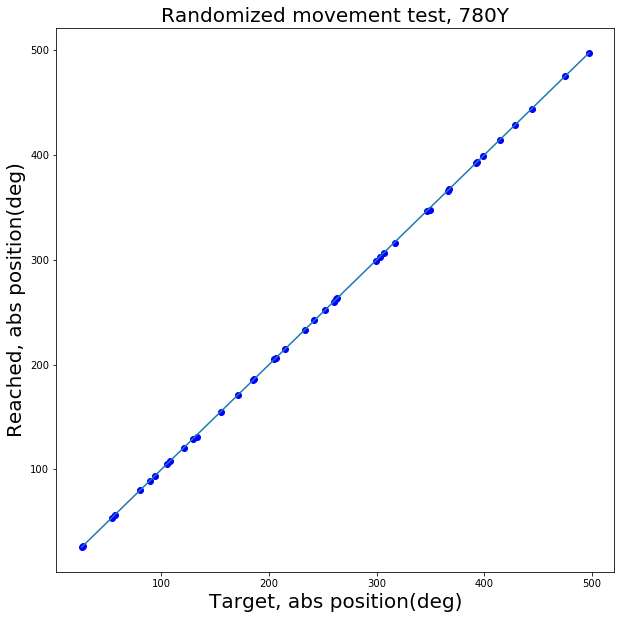

In [6]:
import matplotlib.pyplot as plt
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
plt.plot(np.insert(random_sequence,0,np.median(random_sequence)),positions, 'bo');
plt.plot(values,values)
plt.title('Randomized movement test, 780Y',fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Reached, abs position(deg)',fontsize=20)
plt.savefig('Randomized_movement_test_780Y.pdf')
plt.savefig('Randomized_movement_test_780Y.png')
plt.show()

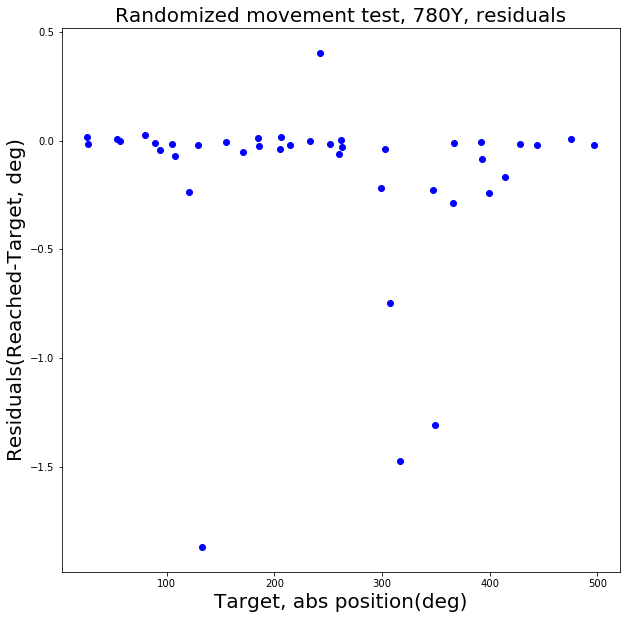

In [11]:
import matplotlib.pyplot as plt
values=np.linspace(np.min(random_sequence),np.max(random_sequence),2)
fig=plt.figure(figsize=(10,10));
plt.plot(np.insert(random_sequence,0,np.median(random_sequence)),positions-np.insert(random_sequence,0,np.median(random_sequence)), 'bo');
plt.title('Randomized movement test, 780Y, residuals',fontsize=20)
plt.xlabel('Target, abs position(deg)',fontsize=20)
plt.ylabel('Residuals(Reached-Target, deg)',fontsize=20)
plt.savefig('Randomized_movement_test_780Y,residuals.pdf')
plt.savefig('Randomized_movement_test_780Y,residuals.png')
plt.show()

In [65]:
positions

[0.0,
 19,
 31,
 262,
 115,
 198,
 92,
 117,
 116,
 178,
 170,
 285,
 137,
 207,
 258,
 285,
 181,
 263,
 260,
 154,
 242,
 266,
 236,
 293,
 244,
 231,
 264,
 80,
 83,
 158,
 254]

In [24]:
## other random tests

In [3]:
mc.getPosition(0)
mc.move_abs(0,220)
mc.getPosition(0)

INFO - Channel: 0 position: 220.034179688
INFO - Channel: 0 position: 220.034179688
INFO - Already within acceptable angle error, not moving
INFO - Channel: 0 position: 220.034179688


780
0
780
0
780
0


220.0341796875

In [36]:
# Implement escaping feature?
first=mc.getPosition(0)
mc.move_rel_steps(0,1000)
last=mc.getPosition(0)
print(last-first)

INFO - Channel: 0 position: 153.500976562
INFO - Response: ''

INFO - Sending next command(385): '1PR1000\r\n'


780
0
pos:3493


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 164.00390625


780
0
pos:3732
10.5029296875


In [14]:
testchannel=0
first=mc.getPosition(testchannel)
mc.move_rel_steps(testchannel,3000)
last=mc.getPosition(testchannel)
print(last-first)

INFO - Channel: 0 position: 186.723632812
INFO - Response: ''

INFO - Sending next command(26): '1PR3000\r\n'


780
0


INFO - Motor 1: movement ceased. Continuing with command buffer.

INFO - Channel: 0 position: 224.560546875


780
0
37.8369140625
